# Deep Deterministic Policy Gradient (DDPG)
---
This notebook implements a DDPG agent with Unity's Udacity-modified Reacher environment.

### 1. Import the Necessary Packages

In [1]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import time   

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below. 

Change the __*visible_environment*__ variable to enable training with (True) or without (False) a visible environment.

The output below indicates the utilization of a cpu or a gpu.

In [2]:
from unityagents import UnityEnvironment
from ddpg_agent import Agent

# set these parameters
visible_environment = True # False for training

if visible_environment == True:
    env = UnityEnvironment(file_name='../unity_environments/Tennis_Linux/Tennis.x86_64')
elif visible_environment == False:
    env = UnityEnvironment(file_name='../unity_environments/Tennis_Linux_NoVis/Tennis.x86_64')   

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)

# number of actions and states
action_size = brain.vector_action_space_size

states = env_info.vector_observations
state_size = states.shape[1]

RANDOM_SEED = 1
BUFFER_SIZE = int(1e6)
BATCH_SIZE = 64
GAMMA = 0.99
TAU = 1e-3
LR_ACTOR = 1e-3
LR_CRITIC = 1e-3
WEIGHT_DECAY = 0

agent = Agent(state_size=state_size, action_size=action_size, random_seed=RANDOM_SEED,
              buffer_size=int(BUFFER_SIZE), batch_size=int(BATCH_SIZE), gamma=GAMMA, tau=TAU, 
              lr_actor=LR_ACTOR, lr_critic=LR_CRITIC, weight_decay=WEIGHT_DECAY)


device =  cpu


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 3. Train the Agent with DDPG

Run the code cell below to train the agent from scratch.

Alternatively, **skip** to the next step below (**4. Watch a Smart Agent!**), to load the saved model weights from a pre-trained agent.

['buffer_size = ', 1000000, 'batch_size = ', 64, 'gamma=', 0.99, 'tau=', 0.001, 'lr_actor= ', 0.001, 'lr_critic=', 0.001, 'weight_decay=', 0]
actions =  [[0.0590067  0.11865096]
 [0.0609831  0.11718946]]
actions =  [[0.20773229 0.14226775]
 [0.20824158 0.14298785]]
actions =  [[0.27881983 0.20626804]
 [0.28117254 0.204397  ]]
actions =  [[0.3739947  0.32679456]
 [0.37544525 0.324421  ]]
actions =  [[0.34149382 0.27809566]
 [0.34316233 0.27479428]]
actions =  [[0.4619366  0.31654778]
 [0.46345976 0.31329712]]
actions =  [[0.5497026  0.2638459 ]
 [0.5512098  0.26071173]]
actions =  [[0.5618059  0.36209005]
 [0.5626067  0.35952646]]
actions =  [[0.5276888  0.49155626]
 [0.5288317  0.4887517 ]]
actions =  [[0.63326913 0.4180145 ]
 [0.63483214 0.41531238]]
actions =  [[0.5477761  0.4576173 ]
 [0.5488847  0.45532545]]
actions =  [[0.658165   0.45874652]
 [0.65936196 0.45608658]]
actions =  [[0.60647213 0.46911117]
 [0.60798365 0.4670334 ]]
actions =  [[0.5266021  0.43633562]
 [0.52758354 0.4

actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1.         1.        ]
 [0.95083106 1.        ]]
actions =  [[1.         1.        ]
 [0.37716237 1.        ]]
actions =  [[1.         1.        ]
 [0.85833967 1.        ]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1.        1.       ]
 [0.6843577 1.       ]]
actions =  [[ 1.          1.        ]
 [-0.11430652  1.        ]]
actions =  [[1.        1.       ]
 [0.9624306 1.       ]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[ 1.        1.      ]
 [-0.287218  1.      ]]
actions =  [[ 0.9549155  1.       ]
 [-0.3520652  1.       ]]
actions =  [[0.64091647 1.        ]
 [0.84010607 1.        ]]
Episode 10	Average Score: -0.00 	Score: -0.00
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1

actions =  [[ 1.         -0.38361087]
 [ 1.          1.        ]]
actions =  [[1.        0.8495007]
 [1.        1.       ]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
Episode 25	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.89625573]
 [ 1.         -0.8962611 ]]
actions =  [[ 1.        -0.844542 ]
 [ 1.        -0.8480856]]
actions =  [[ 1.          0.98015565]
 [ 1.         -0.67661464]]
actions =  [[1.         1.        ]
 [1.         0.70083946]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
acti

actions =  [[ 1.         -0.47776884]
 [ 1.         -0.4524191 ]]
actions =  [[ 1.         -0.4187275 ]
 [ 1.         -0.38703808]]
actions =  [[ 1.         -0.48365626]
 [ 1.         -0.41131112]]
actions =  [[ 1.         -0.35363325]
 [ 1.          0.55226153]]
actions =  [[1.        0.8973362]
 [1.        1.       ]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
Episode 36	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.86313397]
 [ 1.         -0.8631349 ]]
actions =  [[ 1.        -0.853059 ]
 [ 1.        -0.8534759]]
actions =  [[ 1.          0.3281187 ]
 [ 1.         -0.61689687]]
actions =  [[ 1.         -0.26461333]
 [ 1.          0.27331585]]
actions =  [[ 1.         -0.28095368]
 [ 1.          0.466079  ]]
actions =  [[1.         0.02300931]
 [1.         0.8017633 ]]
actions =  [[1.       0.386459]
 [1.       1.      ]]
actions =  [[1.         0.72821623]
 [1.         1.        ]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions 

actions =  [[ 1.         -0.43939364]
 [ 1.         -0.68976   ]]
actions =  [[ 1.         -0.25365245]
 [ 1.         -0.7037885 ]]
actions =  [[ 1.         -0.21050964]
 [ 1.         -0.6426415 ]]
actions =  [[ 1.         -0.17095423]
 [ 1.         -0.5284264 ]]
actions =  [[ 1.         -0.27119756]
 [ 1.         -0.58024704]]
actions =  [[ 1.         -0.23846243]
 [ 1.         -0.5743562 ]]
actions =  [[ 1.          0.5910098 ]
 [ 1.         -0.22992952]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
Episode 46	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.9461156]
 [ 1.        -0.9461155]]
actions =  [[ 1.        -0.7861954]
 [ 1.        -0.7862031]]
actions =  [[ 1.        -0.6555726]
 [ 1.        -0.6578914]]
actions =  [[ 1.         -0.38460135]
 [ 1.         -0.5564842 ]]
actions =  [[ 1.         -0.46941763]
 [ 1.         -0.59622765]]
actions =  [[ 1.         -0.28467628]
 [ 1.         -0

actions =  [[1. 1.]
 [1. 1.]]
Episode 55	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8544127]
 [ 1.        -0.8544128]]
actions =  [[ 1.         -0.84297836]
 [ 1.         -0.8429795 ]]
actions =  [[ 1.         -0.8188777 ]
 [ 1.         -0.81890225]]
actions =  [[ 1.         -0.80659837]
 [ 1.         -0.7846707 ]]
actions =  [[ 1.        -0.6512261]
 [ 1.        -0.642469 ]]
actions =  [[ 1.        -0.6553241]
 [ 1.        -0.6472663]]
actions =  [[ 1.         -0.5894994 ]
 [ 1.         -0.58143353]]
actions =  [[ 1.        -0.5517377]
 [ 1.        -0.5419993]]
actions =  [[ 1.         -0.47609296]
 [ 1.         -0.46561375]]
actions =  [[ 1.         -0.44278324]
 [ 1.         -0.42054027]]
actions =  [[ 1.         -0.2543438 ]
 [ 1.          0.30839965]]
actions =  [[1.        0.6948899]
 [1.        1.       ]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
Episode 56	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.    

actions =  [[ 1.         -0.45212662]
 [ 1.         -0.48151094]]
actions =  [[ 1.        -0.3809536]
 [ 1.        -0.4145587]]
actions =  [[ 1.         -0.42297274]
 [ 1.         -0.45670485]]
actions =  [[ 1.         -0.50010663]
 [ 1.         -0.5353706 ]]
actions =  [[ 1.         -0.50753796]
 [ 1.         -0.54431033]]
actions =  [[ 1.         -0.46965846]
 [ 1.         -0.5139375 ]]
actions =  [[ 1.         -0.30463377]
 [ 1.         -0.49224064]]
actions =  [[ 1.         0.6518583]
 [ 1.        -0.4762484]]
actions =  [[1.       1.      ]
 [1.       0.092515]]
actions =  [[1. 1.]
 [1. 1.]]
Episode 65	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.8063131 ]
 [ 1.         -0.80631334]]
actions =  [[ 1.        -0.7039317]
 [ 1.        -0.7039377]]
actions =  [[ 1.         -0.57323587]
 [ 1.         -0.57342803]]
actions =  [[ 1.         -0.57313967]
 [ 1.         -0.5517452 ]]
actions =  [[ 1.         -0.57093376]
 [ 1.         -0.5549699 ]]
actions =  [[ 1.        

actions =  [[ 1.         -0.49988958]
 [ 1.         -0.24309805]]
actions =  [[ 1.         -0.42034733]
 [ 1.         -0.17686546]]
actions =  [[ 1.         -0.33389908]
 [ 1.         -0.09744042]]
actions =  [[ 1.         -0.2830505 ]
 [ 1.          0.07480804]]
actions =  [[ 1.        -0.2111054]
 [ 1.         0.8148875]]
actions =  [[1.        0.1912092]
 [1.        1.       ]]
actions =  [[1. 1.]
 [1. 1.]]
actions =  [[1. 1.]
 [1. 1.]]
Episode 74	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.9041091 ]
 [ 1.         -0.90408534]]
actions =  [[ 1.         -0.72629213]
 [ 1.         -0.7262935 ]]
actions =  [[ 1.        -0.7202454]
 [ 1.        -0.7204453]]
actions =  [[ 1.         -0.22173575]
 [ 1.         -0.5791922 ]]
actions =  [[ 1.         -0.30982944]
 [ 1.         -0.54316986]]
actions =  [[ 1.         -0.21703486]
 [ 1.         -0.5639066 ]]
actions =  [[ 1.         -0.10826121]
 [ 1.         -0.48142204]]
actions =  [[ 1.          0.03390078]
 [ 1.         

actions =  [[ 1.         -0.65258783]
 [ 1.         -0.51638013]]
actions =  [[ 1.        -0.5261163]
 [ 1.        -0.3654967]]
actions =  [[ 1.         -0.5266048 ]
 [ 1.         -0.33686036]]
actions =  [[ 1.         -0.47199717]
 [ 1.         -0.20187894]]
actions =  [[ 1.         -0.48324066]
 [ 1.          0.12268214]]
actions =  [[ 1.         -0.40594062]
 [ 1.          1.        ]]
actions =  [[ 1.         -0.28332737]
 [ 1.          1.        ]]
actions =  [[ 1.       -0.037499]
 [ 1.        1.      ]]
actions =  [[1. 1.]
 [1. 1.]]
Episode 83	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.95029914]
 [ 1.         -0.95029825]]
actions =  [[ 1.        -0.9296973]
 [ 1.        -0.9296968]]
actions =  [[ 1.         -0.804302  ]
 [ 1.         -0.80413705]]
actions =  [[ 1.         -0.78491694]
 [ 1.         -0.4118733 ]]
actions =  [[ 1.        -0.6219682]
 [ 1.        -0.3147966]]
actions =  [[ 1.         -0.52416176]
 [ 1.         -0.16538434]]
actions =  [[ 1.    

Episode 91	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.93028754]
 [ 1.         -0.9305632 ]]
actions =  [[ 1.         -0.78875613]
 [ 1.         -0.7887591 ]]
actions =  [[ 1.        -0.7025659]
 [ 1.        -0.7037268]]
actions =  [[ 1.        -0.4738213]
 [ 1.        -0.7150209]]
actions =  [[ 1.        -0.5522923]
 [ 1.        -0.7450683]]
actions =  [[ 1.        -0.4811278]
 [ 1.        -0.681341 ]]
actions =  [[ 1.         -0.37905374]
 [ 1.         -0.5709937 ]]
actions =  [[ 1.         -0.36677116]
 [ 1.         -0.59039325]]
actions =  [[ 1.         -0.22258416]
 [ 1.         -0.5933523 ]]
actions =  [[ 1.          0.48238918]
 [ 1.         -0.46521404]]
actions =  [[ 1.         1.       ]
 [ 1.        -0.4705035]]
actions =  [[ 1.          1.        ]
 [ 1.         -0.35313347]]
actions =  [[ 1.          1.        ]
 [ 1.         -0.30561358]]
actions =  [[1.         1.        ]
 [1.         0.88093334]]
Episode 92	Average Score: -0.00 	Score: -0.00
actions 

actions =  [[ 1.         -0.14137329]
 [ 1.          1.        ]]
actions =  [[1.         0.75100166]
 [1.         1.        ]]
Episode 100	Average Score: -0.00 	Score: -0.00
Episode 100	Average Score: -0.00
	 Elapsed Time: 30.59 seconds
actions =  [[ 1.         -0.93589383]
 [ 1.         -0.93589294]]
actions =  [[ 1.         -0.83866876]
 [ 1.         -0.83866787]]
actions =  [[ 1.         -0.83309084]
 [ 1.         -0.83252186]]
actions =  [[ 1.         -0.8036515 ]
 [ 1.         -0.66554946]]
actions =  [[ 1.        -0.8011455]
 [ 1.        -0.7316317]]
actions =  [[ 1.         -0.6587236 ]
 [ 1.         -0.61031353]]
actions =  [[ 1.         -0.67643327]
 [ 1.         -0.6286112 ]]
actions =  [[ 1.         -0.5871186 ]
 [ 1.         -0.52923757]]
actions =  [[ 1.        -0.6008122]
 [ 1.        -0.5080038]]
actions =  [[ 1.         -0.4814914 ]
 [ 1.         -0.22719689]]
actions =  [[ 1.         -0.37288672]
 [ 1.          0.5038197 ]]
actions =  [[ 1.         -0.3225692 ]
 [ 1. 

actions =  [[ 1.         -0.40839028]
 [ 1.          1.        ]]
actions =  [[ 1.        -0.4385236]
 [ 1.         1.       ]]
actions =  [[ 1.         -0.36107427]
 [ 1.          1.        ]]
actions =  [[ 1.        -0.3441661]
 [ 1.         1.       ]]
Episode 109	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.90748334]
 [ 1.         -0.90750015]]
actions =  [[ 1.         -0.74341244]
 [ 1.         -0.7434163 ]]
actions =  [[ 1.         -0.64337254]
 [ 1.         -0.643565  ]]
actions =  [[ 1.         -0.47359627]
 [ 1.         -0.5121822 ]]
actions =  [[ 1.        -0.4123897]
 [ 1.        -0.4307788]]
actions =  [[ 1.        -0.4280916]
 [ 1.        -0.4409064]]
actions =  [[ 1.         -0.41774765]
 [ 1.         -0.43282273]]
actions =  [[ 1.         -0.31235757]
 [ 1.         -0.33310136]]
actions =  [[ 1.         -0.32916978]
 [ 1.         -0.39015397]]
actions =  [[ 1.         -0.10071594]
 [ 1.         -0.39409012]]
actions =  [[ 1.          0.64195067]
 [ 1.  

actions =  [[ 1.         -0.75389874]
 [ 1.         -0.76545686]]
actions =  [[ 1.        -0.7597277]
 [ 1.        -0.7830274]]
actions =  [[ 1.         -0.61970663]
 [ 1.         -0.7711533 ]]
actions =  [[ 1.         -0.02957018]
 [ 1.         -0.80270725]]
actions =  [[ 1.         0.8451738]
 [ 1.        -0.8015491]]
actions =  [[ 1.          0.79389864]
 [ 1.         -0.73866427]]
actions =  [[ 1.         1.       ]
 [ 1.        -0.6227972]]
actions =  [[ 1.         1.       ]
 [ 1.        -0.5385146]]
Episode 118	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.80948615]
 [ 1.         -0.80935717]]
actions =  [[ 1.        -0.7773827]
 [ 1.        -0.7773821]]
actions =  [[ 1.        -0.6128575]
 [ 1.        -0.6127283]]
actions =  [[ 1.         -0.48208106]
 [ 1.         -0.43415993]]
actions =  [[ 1.        -0.5322416]
 [ 1.        -0.5057794]]
actions =  [[ 1.         -0.53804225]
 [ 1.         -0.5215316 ]]
actions =  [[ 1.        -0.5995693]
 [ 1.        -0.57772

actions =  [[ 1.         -0.5855652 ]
 [ 1.         -0.58555984]]
actions =  [[ 1.         -0.45252135]
 [ 1.         -0.45074186]]
actions =  [[ 1.         -0.42574167]
 [ 1.         -0.42465204]]
actions =  [[ 1.        -0.3823819]
 [ 1.        -0.3803418]]
actions =  [[ 1.         -0.43998852]
 [ 1.         -0.43698123]]
actions =  [[ 1.         -0.5087107 ]
 [ 1.         -0.50277174]]
actions =  [[ 1.         -0.48238534]
 [ 1.         -0.42905384]]
actions =  [[ 1.         -0.4943479 ]
 [ 1.          0.07600408]]
actions =  [[ 1.         -0.51864463]
 [ 1.          1.        ]]
actions =  [[ 1.         -0.49010786]
 [ 1.          1.        ]]
actions =  [[ 1.         -0.45310315]
 [ 1.          0.32548112]]
actions =  [[ 1.         -0.37632978]
 [ 1.         -0.01873063]]
Episode 127	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.97304434]
 [ 1.         -0.97305506]]
actions =  [[ 1.         -0.8526472 ]
 [ 1.         -0.85264724]]
actions =  [[ 1.         -0.79922

actions =  [[ 1.         -0.44344783]
 [ 1.          0.9915834 ]]
actions =  [[ 1.         -0.37090886]
 [ 1.          0.22008   ]]
actions =  [[ 1.         -0.36236194]
 [ 1.         -0.3566517 ]]
Episode 135	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.9494249]
 [ 1.        -0.9494251]]
actions =  [[ 1.         -0.8824439 ]
 [ 1.         -0.88244396]]
actions =  [[ 1.         -0.88163173]
 [ 1.         -0.88163215]]
actions =  [[ 1.         -0.8653251 ]
 [ 1.         -0.86552536]]
actions =  [[ 1.        -0.7385912]
 [ 1.        -0.7387187]]
actions =  [[ 1.        -0.6737537]
 [ 1.        -0.6740307]]
actions =  [[ 1.         -0.5671867 ]
 [ 1.         -0.56773293]]
actions =  [[ 1.         -0.46965545]
 [ 1.         -0.47118556]]
actions =  [[ 1.         -0.38260046]
 [ 1.         -0.3894566 ]]
actions =  [[ 1.         -0.13271631]
 [ 1.         -0.30663362]]
actions =  [[ 1.          0.826581  ]
 [ 1.         -0.32176575]]
actions =  [[ 1.          0.48041093]
 [ 

actions =  [[ 1.        1.      ]
 [ 1.       -0.317039]]
actions =  [[ 1.          0.09998345]
 [ 1.         -0.2207517 ]]
actions =  [[ 1.         -0.19432828]
 [ 1.         -0.19680586]]
Episode 144	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8451142]
 [ 1.        -0.8451162]]
actions =  [[ 1.         -0.7761975 ]
 [ 1.         -0.77619755]]
actions =  [[ 1.         -0.7092156 ]
 [ 1.         -0.70921564]]
actions =  [[ 1.        -0.7099809]
 [ 1.        -0.7099918]]
actions =  [[ 1.        -0.6749791]
 [ 1.        -0.6749918]]
actions =  [[ 1.         -0.70915794]
 [ 1.         -0.7092    ]]
actions =  [[ 1.        -0.5756996]
 [ 1.        -0.5758071]]
actions =  [[ 1.        -0.5633415]
 [ 1.        -0.5637894]]
actions =  [[ 1.         -0.58490306]
 [ 1.         -0.58859247]]
actions =  [[ 1.         -0.35203516]
 [ 1.         -0.5233458 ]]
actions =  [[ 1.          0.83611315]
 [ 1.         -0.5467439 ]]
actions =  [[ 1.         -0.23462918]
 [ 1.         -0.50

actions =  [[ 1.         -0.513603  ]
 [ 1.         -0.21535465]]
actions =  [[ 1.         -0.40286946]
 [ 1.          1.        ]]
actions =  [[ 1.         -0.31029803]
 [ 1.          0.47770166]]
actions =  [[ 1.         -0.23772758]
 [ 1.         -0.21772563]]
actions =  [[ 1.        -0.2691429]
 [ 1.        -0.2346438]]
Episode 153	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.87549675]
 [ 1.         -0.8755063 ]]
actions =  [[ 1.         -0.7275358 ]
 [ 1.         -0.72753584]]
actions =  [[ 1.        -0.6950338]
 [ 1.        -0.6950338]]
actions =  [[ 1.        -0.6374639]
 [ 1.        -0.6374691]]
actions =  [[ 1.        -0.6762876]
 [ 1.        -0.6762957]]
actions =  [[ 1.         -0.64715695]
 [ 1.         -0.64718837]]
actions =  [[ 1.         -0.53273576]
 [ 1.         -0.53281766]]
actions =  [[ 1.         -0.42294794]
 [ 1.         -0.42320228]]
actions =  [[ 1.         -0.4390804 ]
 [ 1.         -0.44070706]]
actions =  [[ 1.         -0.42321867]
 [ 1.  

actions =  [[ 1.         -0.52764934]
 [ 1.         -0.5276155 ]]
actions =  [[ 1.         -0.42717025]
 [ 1.         -0.4267138 ]]
actions =  [[ 1.         -0.38509312]
 [ 1.         -0.35110638]]
actions =  [[ 1.         -0.41847953]
 [ 1.          0.45348582]]
actions =  [[ 1.        -0.4689185]
 [ 1.         1.       ]]
actions =  [[ 1.        -0.5105424]
 [ 1.         1.       ]]
actions =  [[ 1.         -0.39024648]
 [ 1.          0.01755098]]
Episode 162	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.9331838]
 [ 1.        -0.9331815]]
actions =  [[ 1.        -0.8021232]
 [ 1.        -0.8021232]]
actions =  [[ 1.        -0.6787201]
 [ 1.        -0.6787201]]
actions =  [[ 1.         -0.55067164]
 [ 1.         -0.55066925]]
actions =  [[ 1.         -0.4969186 ]
 [ 1.         -0.49691555]]
actions =  [[ 1.        -0.4818461]
 [ 1.        -0.4818383]]
actions =  [[ 1.         -0.43217984]
 [ 1.         -0.43215653]]
actions =  [[ 1.        -0.3475622]
 [ 1.        -0.3

actions =  [[ 1.         -0.67606914]
 [ 1.         -0.67606914]]
actions =  [[ 1.         -0.61034244]
 [ 1.         -0.610342  ]]
actions =  [[ 1.         -0.57094985]
 [ 1.         -0.5709492 ]]
actions =  [[ 1.         -0.63262266]
 [ 1.         -0.63262117]]
actions =  [[ 1.         -0.60114855]
 [ 1.         -0.6011451 ]]
actions =  [[ 1.         -0.6161633 ]
 [ 1.         -0.61615455]]
actions =  [[ 1.         -0.62918013]
 [ 1.         -0.62914586]]
actions =  [[ 1.        -0.5068532]
 [ 1.        -0.5066361]]
actions =  [[ 1.         -0.55926734]
 [ 1.         -0.5495796 ]]
actions =  [[ 1.         -0.62318045]
 [ 1.         -0.18137804]]
actions =  [[ 1.         -0.5599796 ]
 [ 1.          0.34042442]]
actions =  [[ 1.         -0.4991197 ]
 [ 1.          0.47143957]]
actions =  [[ 1.        -0.5447577]
 [ 1.         0.4617154]]
Episode 171	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8241603]
 [ 1.        -0.8241616]]
actions =  [[ 1.         -0.69426185]
 [ 

actions =  [[ 1.          0.87074035]
 [ 1.         -0.37364304]]
actions =  [[ 1.          0.06316106]
 [ 1.         -0.32203588]]
Episode 179	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.8517653 ]
 [ 1.         -0.85176665]]
actions =  [[ 1.        -0.8671595]
 [ 1.        -0.8671595]]
actions =  [[ 1.         -0.77782965]
 [ 1.         -0.77782965]]
actions =  [[ 1.        -0.6490106]
 [ 1.        -0.6490106]]
actions =  [[ 1.        -0.5678925]
 [ 1.        -0.5678926]]
actions =  [[ 1.         -0.5939481 ]
 [ 1.         -0.59394825]]
actions =  [[ 1.         -0.509892  ]
 [ 1.         -0.50989234]]
actions =  [[ 1.        -0.5549028]
 [ 1.        -0.5549036]]
actions =  [[ 1.         -0.58367515]
 [ 1.         -0.58367896]]
actions =  [[ 1.         -0.5817544 ]
 [ 1.         -0.58178407]]
actions =  [[ 1.         -0.5859303 ]
 [ 1.         -0.58687776]]
actions =  [[ 1.         -0.57612824]
 [ 1.         -0.6464959 ]]
actions =  [[ 1.          0.06328342]
 [ 1.  

actions =  [[ 1.         -0.4724919 ]
 [ 1.         -0.47249153]]
actions =  [[ 1.         -0.38305178]
 [ 1.         -0.38305053]]
actions =  [[ 1.        -0.3079673]
 [ 1.        -0.3079571]]
actions =  [[ 1.         -0.2213437 ]
 [ 1.         -0.22113037]]
actions =  [[ 1.         -0.16255884]
 [ 1.         -0.15853493]]
actions =  [[ 1.         -0.14286466]
 [ 1.         -0.12912728]]
actions =  [[ 1.         -0.16309693]
 [ 1.         -0.14550921]]
Episode 188	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8175113]
 [ 1.        -0.8175079]]
actions =  [[ 1.        -0.6943586]
 [ 1.        -0.6943586]]
actions =  [[ 1.         -0.63146466]
 [ 1.         -0.6314646 ]]
actions =  [[ 1.         -0.58826196]
 [ 1.         -0.58826196]]
actions =  [[ 1.         -0.62392014]
 [ 1.         -0.62392   ]]
actions =  [[ 1.         -0.56914145]
 [ 1.         -0.5691406 ]]
actions =  [[ 1.         -0.59254724]
 [ 1.         -0.5925457 ]]
actions =  [[ 1.        -0.5595841]
 [ 1.

Episode 196	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.89995277]
 [ 1.         -0.8999724 ]]
actions =  [[ 1.        -0.8361511]
 [ 1.        -0.8361511]]
actions =  [[ 1.        -0.7207167]
 [ 1.        -0.7207167]]
actions =  [[ 1.        -0.6269431]
 [ 1.        -0.6269431]]
actions =  [[ 1.        -0.6596117]
 [ 1.        -0.6596117]]
actions =  [[ 1.        -0.6161184]
 [ 1.        -0.616118 ]]
actions =  [[ 1.         -0.5240926 ]
 [ 1.         -0.52409244]]
actions =  [[ 1.         -0.58686745]
 [ 1.         -0.58686775]]
actions =  [[ 1.         -0.52692735]
 [ 1.         -0.52692926]]
actions =  [[ 1.         -0.44725934]
 [ 1.         -0.44727632]]
actions =  [[ 1.         -0.44421095]
 [ 1.         -0.4445358 ]]
actions =  [[ 1.         -0.41441816]
 [ 1.         -0.41865242]]
actions =  [[ 1.         -0.34888098]
 [ 1.         -0.3589315 ]]
actions =  [[ 1.         -0.27277687]
 [ 1.         -0.2837852 ]]
Episode 197	Average Score: -0.00 	Score: -0.00
ac

actions =  [[ 1.        -0.5464001]
 [ 1.        -0.5463952]]
actions =  [[ 1.         -0.52165097]
 [ 1.         -0.521625  ]]
actions =  [[ 1.         -0.57964456]
 [ 1.         -0.57924795]]
actions =  [[ 1.        -0.519706 ]
 [ 1.        -0.4691175]]
actions =  [[ 1.        -0.5716547]
 [ 1.         0.4268443]]
actions =  [[ 1.         -0.5808294 ]
 [ 1.          0.95321846]]
actions =  [[ 1.        -0.6100296]
 [ 1.         1.       ]]
Episode 205	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.9894547 ]
 [ 1.         -0.98945415]]
actions =  [[ 1.         -0.89671314]
 [ 1.         -0.89671314]]
actions =  [[ 1.        -0.8431805]
 [ 1.        -0.8431804]]
actions =  [[ 1.         -0.8323862 ]
 [ 1.         -0.83238626]]
actions =  [[ 1.         -0.8319954 ]
 [ 1.         -0.83199555]]
actions =  [[ 1.         -0.78414476]
 [ 1.         -0.7841526 ]]
actions =  [[ 1.         -0.81447685]
 [ 1.         -0.81448483]]
actions =  [[ 1.        -0.7998272]
 [ 1.        

actions =  [[ 1.         -0.74472576]
 [ 1.         -0.74472576]]
actions =  [[ 1.        -0.5902734]
 [ 1.        -0.5902734]]
actions =  [[ 1.        -0.6151029]
 [ 1.        -0.6151029]]
actions =  [[ 1.         -0.6588509 ]
 [ 1.         -0.65885097]]
actions =  [[ 1.        -0.6057115]
 [ 1.        -0.6057318]]
actions =  [[ 1.         -0.643469  ]
 [ 1.         -0.64348745]]
actions =  [[ 1.        -0.6276683]
 [ 1.        -0.6276726]]
actions =  [[ 1.         -0.54680336]
 [ 1.         -0.5467116 ]]
actions =  [[ 1.        -0.5811955]
 [ 1.        -0.5787065]]
actions =  [[ 1.        -0.6309219]
 [ 1.        -0.3455507]]
actions =  [[ 1.        -0.6703366]
 [ 1.         0.2826353]]
actions =  [[ 1.         -0.66242814]
 [ 1.          0.4579028 ]]
actions =  [[ 1.        -0.5503787]
 [ 1.         0.5905931]]
Episode 214	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.       -0.815012]
 [ 1.       -0.815012]]
actions =  [[ 1.        -0.6971574]
 [ 1.        -0.6971574]]
actions

actions =  [[ 1.         -0.38415226]
 [ 1.         -0.36700377]]
actions =  [[ 1.          0.21327953]
 [ 1.         -0.28879914]]
actions =  [[ 1.          0.5011705 ]
 [ 1.         -0.37056386]]
actions =  [[ 1.          0.73501086]
 [ 1.         -0.3613169 ]]
actions =  [[ 1.         -0.23739362]
 [ 1.         -0.39116907]]
Episode 222	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.97277427]
 [ 1.         -0.9727741 ]]
actions =  [[ 1.        -0.8917571]
 [ 1.        -0.8917571]]
actions =  [[ 1.        -0.8460159]
 [ 1.        -0.8460159]]
actions =  [[ 1.        -0.8050066]
 [ 1.        -0.805007 ]]
actions =  [[ 1.        -0.786156 ]
 [ 1.        -0.7861564]]
actions =  [[ 1.        -0.734949 ]
 [ 1.        -0.7351798]]
actions =  [[ 1.         -0.6372576 ]
 [ 1.         -0.63745296]]
actions =  [[ 1.         -0.6834624 ]
 [ 1.         -0.68364596]]
actions =  [[ 1.        -0.7222568]
 [ 1.        -0.7225269]]
actions =  [[ 1.        -0.6447697]
 [ 1.        -0.6

actions =  [[ 1.        -0.5932079]
 [ 1.        -0.5964273]]
actions =  [[ 1.         -0.45541754]
 [ 1.         -0.4621443 ]]
actions =  [[ 1.         -0.4942983 ]
 [ 1.         -0.49358383]]
actions =  [[ 1.         -0.53377604]
 [ 1.          0.36324105]]
actions =  [[ 1.        -0.412509 ]
 [ 1.         0.8420545]]
actions =  [[ 1.         -0.38027346]
 [ 1.          0.88597775]]
actions =  [[ 1.         -0.31981152]
 [ 1.         -0.4637854 ]]
Episode 231	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.83532375]
 [ 1.         -0.8353237 ]]
actions =  [[ 1.       -0.705769]
 [ 1.       -0.705769]]
actions =  [[ 1.        -0.7442638]
 [ 1.        -0.7442638]]
actions =  [[ 1.        -0.6178021]
 [ 1.        -0.6178026]]
actions =  [[ 1.        -0.565406 ]
 [ 1.        -0.5654067]]
actions =  [[ 1.         -0.5033148 ]
 [ 1.         -0.50427586]]
actions =  [[ 1.         -0.41575164]
 [ 1.         -0.41681653]]
actions =  [[ 1.         -0.41378292]
 [ 1.         -0.41

actions =  [[ 1.        -0.3753766]
 [ 1.        -0.3753818]]
actions =  [[ 1.         -0.43823212]
 [ 1.         -0.43831956]]
actions =  [[ 1.         -0.4753519 ]
 [ 1.         -0.47770765]]
actions =  [[ 1.         -0.07269467]
 [ 1.         -0.3939973 ]]
actions =  [[ 0.8869131   0.74925834]
 [ 1.         -0.4188161 ]]
actions =  [[ 0.4410876   0.9037682 ]
 [ 1.         -0.48617402]]
actions =  [[ 0.24089232  1.        ]
 [ 1.         -0.54948056]]
Episode 240	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.86304057]
 [ 1.         -0.8630408 ]]
actions =  [[ 1.         -0.76057553]
 [ 1.         -0.7605756 ]]
actions =  [[ 1.        -0.6266931]
 [ 1.        -0.6266931]]
actions =  [[ 1.         -0.66525674]
 [ 1.         -0.66525674]]
actions =  [[ 1.        -0.5627604]
 [ 1.        -0.5627606]]
actions =  [[ 1.         -0.5393021 ]
 [ 1.         -0.53929746]]
actions =  [[ 1.         -0.49453837]
 [ 1.         -0.4945355 ]]
actions =  [[ 1.         -0.39731053]
 [ 

actions =  [[ 1.        -0.8643212]
 [ 1.        -0.8643213]]
actions =  [[ 1.        -0.7545533]
 [ 1.        -0.7545533]]
actions =  [[ 1.         -0.66789955]
 [ 1.         -0.66790086]]
actions =  [[ 1.        -0.5564792]
 [ 1.        -0.5564831]]
actions =  [[ 1.        -0.6004197]
 [ 1.        -0.6009632]]
actions =  [[ 1.        -0.5351541]
 [ 1.        -0.5354487]]
actions =  [[ 1.         -0.46838838]
 [ 1.         -0.46851623]]
actions =  [[ 1.         -0.42469305]
 [ 1.         -0.42477942]]
actions =  [[ 1.         -0.4978352 ]
 [ 1.         -0.49789372]]
actions =  [[ 1.         -0.482667  ]
 [ 1.         -0.48268202]]
actions =  [[ 1.         -0.37629455]
 [-0.05147352 -0.36513788]]
actions =  [[ 1.         -0.46789074]
 [ 1.         -0.46813107]]
actions =  [[ 1.         -0.43945414]
 [ 1.         -0.43897587]]
Episode 249	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.94680107]
 [ 1.         -0.94680107]]
actions =  [[ 1.         -0.76563054]
 [ 1.      

actions =  [[ 1.         -0.67127347]
 [ 1.         -0.67127347]]
actions =  [[ 1.         -0.71075743]
 [ 1.         -0.71075743]]
actions =  [[ 1.         -0.72881633]
 [ 1.         -0.7288199 ]]
actions =  [[ 1.        -0.7103817]
 [ 1.        -0.7103885]]
actions =  [[ 1.         -0.6497473 ]
 [ 1.         -0.64976156]]
actions =  [[ 1.         -0.58346164]
 [ 0.02815244 -0.58349186]]
actions =  [[ 1.         -0.448438  ]
 [ 1.         -0.44853842]]
actions =  [[ 1.         -0.3891647 ]
 [ 1.         -0.38971168]]
actions =  [[ 1.         -0.32504195]
 [-0.5934041  -0.3266384 ]]
actions =  [[ 1.         -0.39397556]
 [ 1.         -0.3955168 ]]
actions =  [[ 1.         -0.39208046]
 [ 1.         -0.39317653]]
Episode 258	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8892296]
 [ 1.        -0.8892296]]
actions =  [[ 1.       -0.840272]
 [ 1.       -0.840272]]
actions =  [[ 1.        -0.7040133]
 [ 1.        -0.7040133]]
actions =  [[ 1.         -0.6738657 ]
 [ 1.      

actions =  [[-0.46489206 -0.42225227]
 [ 1.         -0.42215547]]
actions =  [[ 1.         -0.34621403]
 [-0.5065213  -0.34603748]]
actions =  [[-0.5027956  -0.28662145]
 [ 1.         -0.28662187]]
actions =  [[ 1.         -0.30813712]
 [-0.57116276 -0.3081358 ]]
Episode 266	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8297943]
 [ 1.        -0.8297943]]
actions =  [[ 1.         -0.84593666]
 [ 1.         -0.84593666]]
actions =  [[ 1.        -0.7492012]
 [ 1.        -0.7492012]]
actions =  [[ 1.       -0.647257]
 [ 1.       -0.647257]]
actions =  [[ 1.        -0.6663966]
 [ 1.        -0.6663966]]
actions =  [[ 1.         -0.68900293]
 [ 1.         -0.68900347]]
actions =  [[ 1.         -0.72064185]
 [ 1.         -0.72064435]]
actions =  [[ 1.         -0.66429186]
 [ 1.         -0.66430044]]
actions =  [[ 1.         -0.51601166]
 [-0.481915   -0.51605445]]
actions =  [[ 1.        -0.5396381]
 [ 1.        -0.5397755]]
actions =  [[-0.5258538  -0.58639073]
 [-0.5262913  -

actions =  [[ 1.         -0.47464305]
 [ 1.         -0.4793259 ]]
actions =  [[ 1.         -0.4066691 ]
 [ 1.         -0.41223362]]
actions =  [[ 1.         -0.4492164 ]
 [-0.52468437 -0.45415458]]
actions =  [[ 1.         -0.44475508]
 [ 1.         -0.4487294 ]]
actions =  [[ 1.         -0.51250714]
 [ 1.         -0.5177798 ]]
actions =  [[ 1.         -0.50362456]
 [ 1.         -0.52372545]]
actions =  [[ 1.         -0.45343715]
 [-0.44853765 -0.5498139 ]]
actions =  [[ 1.         -0.5541004 ]
 [ 1.         -0.61039186]]
actions =  [[-0.41291755 -0.6236968 ]
 [-0.4179749  -0.6311525 ]]
Episode 275	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8790226]
 [ 1.        -0.8790226]]
actions =  [[ 1.         -0.80728626]
 [ 1.         -0.80728626]]
actions =  [[ 1.         -0.73547816]
 [ 1.         -0.73547816]]
actions =  [[ 1.         -0.6985473 ]
 [-0.7567055  -0.69854724]]
actions =  [[ 1.         -0.66403514]
 [ 1.         -0.66403514]]
actions =  [[ 1.         -0.60357

actions =  [[ 1.         -0.7122266 ]
 [ 1.         -0.71222657]]
actions =  [[ 1.         -0.56662416]
 [ 1.         -0.5666244 ]]
actions =  [[-0.39966634 -0.4865448 ]
 [ 1.         -0.48657578]]
actions =  [[ 1.         -0.55471164]
 [ 1.         -0.5546558 ]]
actions =  [[-0.51791555 -0.48305428]
 [ 1.         -0.4824493 ]]
actions =  [[ 1.        -0.5406162]
 [-0.4640264 -0.5404921]]
actions =  [[-0.43118566 -0.48494095]
 [ 1.         -0.48494083]]
Episode 284	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.9895978]
 [ 1.        -0.9895978]]
actions =  [[ 1.        -0.8544382]
 [ 1.        -0.8544382]]
actions =  [[ 1.         -0.76878804]
 [ 1.         -0.76878804]]
actions =  [[ 1.        -0.8016743]
 [ 1.        -0.8016743]]
actions =  [[ 1.        -0.7677015]
 [ 1.        -0.7677015]]
actions =  [[ 1.        -0.6845622]
 [ 1.        -0.6845614]]
actions =  [[ 1.        -0.6216547]
 [-0.5532165 -0.6216459]]
actions =  [[ 1.         -0.53453296]
 [ 1.         -0.53

actions =  [[ 1.         -0.4516541 ]
 [ 1.         -0.45277008]]
actions =  [[ 1.         -0.35813805]
 [-0.45524415 -0.35895678]]
actions =  [[-0.36882794 -0.4526502 ]
 [ 1.         -0.4527774 ]]
actions =  [[ 1.         -0.47600976]
 [-0.39850205 -0.4760097 ]]
Episode 293	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.9795693]
 [ 1.        -0.9795693]]
actions =  [[ 1.         -0.79808015]
 [ 1.         -0.79808015]]
actions =  [[ 1.        -0.8013244]
 [ 1.        -0.8013244]]
actions =  [[ 1.        -0.7574028]
 [ 1.        -0.7574028]]
actions =  [[ 1.         -0.62733406]
 [ 1.         -0.62733406]]
actions =  [[ 1.        -0.5391145]
 [ 1.        -0.5391145]]
actions =  [[ 1.         -0.4474252 ]
 [ 1.         -0.44742513]]
actions =  [[ 1.         -0.48175249]
 [ 0.40527034 -0.48172614]]
actions =  [[ 1.        -0.5075627]
 [ 1.        -0.5075714]]
actions =  [[ 1.         -0.5020764 ]
 [-0.38029057 -0.50203234]]
actions =  [[ 1.         -0.45158237]
 [ 1.      

actions =  [[ 1.        -0.7692653]
 [ 1.        -0.7692651]]
actions =  [[ 1.         -0.68226737]
 [ 1.         -0.68226683]]
actions =  [[-0.48888913 -0.6521237 ]
 [ 1.         -0.6521217 ]]
actions =  [[ 1.         -0.5381973 ]
 [ 1.         -0.53817683]]
actions =  [[ 1.         -0.46896356]
 [ 1.         -0.4688856 ]]
actions =  [[ 1.         -0.45255807]
 [-0.48194987 -0.4524912 ]]
actions =  [[-0.38221276 -0.4364253 ]
 [ 1.         -0.4364253 ]]
actions =  [[ 1.        -0.4812664]
 [ 1.        -0.4812664]]
actions =  [[-0.3171487  -0.37380087]
 [ 1.         -0.37380242]]
Episode 302	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.91337866]
 [ 1.         -0.91337866]]
actions =  [[ 1.        -0.8803815]
 [ 1.        -0.8803815]]
actions =  [[ 1.         -0.83050215]
 [ 1.         -0.83050215]]
actions =  [[ 1.         -0.67936385]
 [-0.5339821  -0.67936164]]
actions =  [[ 1.         -0.69190854]
 [ 1.         -0.69190854]]
actions =  [[ 1.        -0.5562603]
 [ 1.

actions =  [[ 1.         -0.68551856]
 [-0.8526571  -0.6855177 ]]
actions =  [[ 1.         -0.66487014]
 [ 1.         -0.66487014]]
actions =  [[ 1.         -0.58525026]
 [ 1.         -0.58526284]]
actions =  [[ 1.         -0.52310276]
 [ 1.         -0.523118  ]]
actions =  [[ 1.        -0.4157414]
 [-0.6425669 -0.4157621]]
actions =  [[ 1.         -0.45314506]
 [ 1.         -0.45315728]]
actions =  [[-0.4988132  -0.4446628 ]
 [ 1.         -0.44467056]]
actions =  [[ 1.         -0.34655538]
 [ 1.         -0.34655538]]
actions =  [[ 1.         -0.2511182 ]
 [-0.48377427 -0.2511184 ]]
actions =  [[ 1.         -0.20854408]
 [ 1.         -0.20854408]]
actions =  [[-0.45874673 -0.22660029]
 [-0.45874673 -0.22660011]]
actions =  [[ 1.         -0.20008044]
 [ 1.         -0.20008044]]
Episode 311	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.85904956]
 [ 1.         -0.85904956]]
actions =  [[ 1.        -0.7835633]
 [ 1.        -0.7835633]]
actions =  [[ 1.       -0.809755]
 [ 

Episode 319	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.87301785]
 [ 1.         -0.87301785]]
actions =  [[ 1.        -0.6928405]
 [ 1.        -0.6928405]]
actions =  [[ 1.        -0.5668525]
 [ 1.        -0.5668525]]
actions =  [[-0.67169094 -0.4658192 ]
 [ 1.         -0.46582404]]
actions =  [[ 1.        -0.3769392]
 [ 1.        -0.3769392]]
actions =  [[ 1.         -0.30372962]
 [ 1.         -0.30372712]]
actions =  [[ 1.         -0.35152772]
 [ 1.         -0.35152343]]
actions =  [[-0.5907285  -0.39029148]
 [ 1.         -0.390277  ]]
actions =  [[ 1.         -0.38375437]
 [ 1.         -0.38372934]]
actions =  [[ 1.         -0.40922388]
 [-0.5017515  -0.40919623]]
actions =  [[ 1.        -0.4551256]
 [ 1.        -0.4551256]]
actions =  [[-0.4899089  -0.5230168 ]
 [ 1.         -0.52301675]]
actions =  [[ 1.        -0.3979121]
 [ 1.        -0.3979121]]
actions =  [[-0.45362943 -0.36601332]
 [-0.45362943 -0.3660135 ]]
Episode 320	Average Score: -0.00 	Score: -0.00
ac

actions =  [[ 1.         -0.549481  ]
 [-0.47526702 -0.5494759 ]]
actions =  [[-0.32119635 -0.59848136]
 [ 1.         -0.5984824 ]]
actions =  [[ 1.        -0.6317763]
 [ 1.        -0.6317763]]
actions =  [[-0.2916698  -0.57100576]
 [ 1.         -0.5710081 ]]
actions =  [[ 1.         -0.507938  ]
 [-0.22077058 -0.50793797]]
actions =  [[-0.25739142 -0.420948  ]
 [ 1.         -0.42094812]]
Episode 328	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8690987]
 [ 1.        -0.8690987]]
actions =  [[ 1.         -0.80436605]
 [ 1.         -0.80436605]]
actions =  [[ 1.         -0.74435294]
 [ 1.         -0.74435294]]
actions =  [[-0.6484278  -0.7450286 ]
 [ 1.         -0.74502903]]
actions =  [[ 1.        -0.6957316]
 [ 1.        -0.6957316]]
actions =  [[ 1.         -0.5971857 ]
 [ 1.         -0.59715855]]
actions =  [[ 1.         -0.5147805 ]
 [ 1.         -0.51473576]]
actions =  [[-0.5439096  -0.53776723]
 [ 1.         -0.5377101 ]]
actions =  [[ 1.         -0.4829671 ]
 [-

actions =  [[ 1.         -0.45714316]
 [ 1.         -0.45714328]]
actions =  [[-0.5196426  -0.36743295]
 [-0.5196426  -0.36746436]]
actions =  [[ 1.         -0.43409225]
 [ 1.         -0.43409225]]
actions =  [[-0.4845804  -0.38984507]
 [-0.4845804  -0.38984674]]
actions =  [[ 1.         -0.40001842]
 [ 1.         -0.40001842]]
actions =  [[-0.5540968  -0.35413954]
 [-0.5540968  -0.3541396 ]]
Episode 337	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8407276]
 [ 1.        -0.8407276]]
actions =  [[ 1.        -0.8436742]
 [ 1.        -0.8436742]]
actions =  [[ 1.        -0.7520784]
 [ 1.        -0.7520784]]
actions =  [[ 1.        -0.7326592]
 [ 1.        -0.7326593]]
actions =  [[ 1.        -0.6990586]
 [ 1.        -0.6990749]]
actions =  [[ 0.36556017 -0.70640296]
 [-0.64573175 -0.7076924 ]]
actions =  [[ 1.         -0.74571943]
 [ 1.         -0.74571943]]
actions =  [[-0.51504964 -0.73136234]
 [ 1.         -0.7325315 ]]
actions =  [[ 1.        -0.6613917]
 [ 1.        

actions =  [[-0.72086054 -0.71516216]
 [-0.7372668  -0.715162  ]]
actions =  [[ 1.         -0.59132326]
 [ 1.         -0.59132326]]
actions =  [[ 1.        -0.483352 ]
 [ 1.        -0.4833519]]
actions =  [[ 1.        -0.4717491]
 [ 1.        -0.4717491]]
actions =  [[-0.5344987  -0.36118087]
 [-0.5344987  -0.36118612]]
actions =  [[ 1.        -0.3476659]
 [ 1.        -0.3476659]]
actions =  [[-0.4449611  -0.2531115 ]
 [-0.4449611  -0.25310788]]
actions =  [[ 1.         -0.28569913]
 [ 1.         -0.28569913]]
actions =  [[-0.40005782 -0.319038  ]
 [-0.40005782 -0.31903818]]
actions =  [[ 1.         -0.30146733]
 [ 0.03087566 -0.30146733]]
actions =  [[-0.25287428 -0.22137527]
 [-0.25287428 -0.22137402]]
actions =  [[-0.2771438  -0.31763616]
 [-0.27714393 -0.31763616]]
Episode 346	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.90942687]
 [ 1.         -0.90942687]]
actions =  [[ 1.         -0.85671717]
 [ 1.         -0.85671717]]
actions =  [[ 1.        -0.7663576]
 [ 1.

Episode 354	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.9951448]
 [ 1.        -0.9951448]]
actions =  [[ 1.         -0.94893134]
 [ 1.         -0.94893134]]
actions =  [[ 1.        -0.9028606]
 [ 1.        -0.9028606]]
actions =  [[-0.7399786  -0.7174574 ]
 [ 1.         -0.71745884]]
actions =  [[ 1.        -0.6249644]
 [-0.6751247 -0.6249643]]
actions =  [[ 1.       -0.535583]
 [ 1.       -0.535583]]
actions =  [[ 1.        -0.5618824]
 [ 1.        -0.5618824]]
actions =  [[-0.5255379  -0.51786137]
 [ 1.         -0.51786155]]
actions =  [[ 1.         -0.49727726]
 [-0.48113477 -0.4972757 ]]
actions =  [[-0.5112835  -0.4345346 ]
 [ 1.         -0.43455046]]
actions =  [[ 1.         -0.4480078 ]
 [-0.44019294 -0.4480075 ]]
actions =  [[-0.33778098 -0.44460914]
 [ 1.         -0.4446104 ]]
actions =  [[ 1.         -0.43124247]
 [-0.2816621  -0.4312412 ]]
actions =  [[-0.27118343 -0.40576947]
 [ 1.         -0.40576953]]
Episode 355	Average Score: -0.00 	Score: -0.00
action

actions =  [[ 1.         -0.50476056]
 [-0.45812458 -0.50475675]]
actions =  [[ 1.        -0.4677197]
 [ 1.        -0.4677197]]
actions =  [[-0.54094523 -0.45307156]
 [-0.54094523 -0.45307156]]
actions =  [[ 1.         -0.39837712]
 [ 1.         -0.39837712]]
actions =  [[-0.56520367 -0.341241  ]
 [-0.56520367 -0.34124154]]
Episode 363	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.       -0.984077]
 [ 1.       -0.984077]]
actions =  [[ 1.        -0.9763369]
 [ 1.        -0.9763369]]
actions =  [[ 1.         -0.95860386]
 [ 1.         -0.95860386]]
actions =  [[ 1.         -0.79734224]
 [-0.70275706 -0.79733306]]
actions =  [[-0.63098377 -0.8016381 ]
 [ 1.         -0.8016384 ]]
actions =  [[ 1.         -0.67354375]
 [ 1.         -0.67354375]]
actions =  [[ 1.         -0.72145885]
 [ 1.         -0.72145885]]
actions =  [[ 1.         -0.7563653 ]
 [-0.64488256 -0.75636506]]
actions =  [[-0.5728884  -0.6226435 ]
 [ 1.         -0.62264824]]
actions =  [[ 1.         -0.5372971 ]
 [-0.54

actions =  [[-0.62780994 -0.35588592]
 [-0.62780994 -0.3558854 ]]
actions =  [[ 1.       -0.369324]
 [ 1.       -0.369324]]
actions =  [[-0.51978236 -0.45006907]
 [-0.51978236 -0.45007116]]
actions =  [[ 1.         -0.34533966]
 [ 1.         -0.34533966]]
actions =  [[-0.5133682  -0.2907795 ]
 [-0.5133682  -0.29077914]]
actions =  [[ 1.        -0.2875952]
 [ 1.        -0.2875952]]
actions =  [[-0.5577857 -0.216069 ]
 [-0.5577857 -0.216069 ]]
Episode 372	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.       -0.839172]
 [ 1.       -0.839172]]
actions =  [[ 1.         -0.82150584]
 [ 1.         -0.82150584]]
actions =  [[ 1.        -0.6773977]
 [ 1.        -0.6773977]]
actions =  [[-0.6179368  -0.59236413]
 [-0.6179368  -0.59236526]]
actions =  [[ 1.        -0.5624352]
 [ 1.        -0.5624352]]
actions =  [[ 1.        -0.5650967]
 [-0.6093345 -0.5650967]]
actions =  [[ 1.         -0.56490463]
 [ 1.         -0.56490463]]
actions =  [[-0.55708706 -0.61495847]
 [-0.55708706 -0.6149575 ]]

actions =  [[-0.5541774 -0.5189978]
 [-0.5541774 -0.518998 ]]
actions =  [[ 1.         -0.52693677]
 [ 1.         -0.52693677]]
actions =  [[-0.47033638 -0.47271615]
 [-0.47033638 -0.47271562]]
actions =  [[ 1.         -0.44946906]
 [ 1.         -0.44946906]]
actions =  [[-0.49642363 -0.4677208 ]
 [-0.49642363 -0.46772188]]
actions =  [[ 1.         -0.35608983]
 [ 1.         -0.35608983]]
actions =  [[-0.49441627 -0.29705533]
 [-0.49441627 -0.2970554 ]]
actions =  [[ 1.         -0.21079122]
 [ 1.         -0.21079122]]
Episode 381	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8886601]
 [ 1.        -0.8886601]]
actions =  [[ 1.         -0.72033256]
 [ 1.         -0.72033256]]
actions =  [[ 1.        -0.7125037]
 [ 1.        -0.7125037]]
actions =  [[-0.6669268 -0.7192657]
 [-0.6669268 -0.7192651]]
actions =  [[ 1.         -0.72672176]
 [ 1.         -0.72672176]]
actions =  [[ 1.         -0.62592083]
 [-0.48786575 -0.6259209 ]]
actions =  [[ 1.         -0.55326694]
 [ 1.  

actions =  [[ 1.       -0.641918]
 [ 1.       -0.641918]]
actions =  [[-0.7701296 -0.6555585]
 [ 1.        -0.6555585]]
actions =  [[ 1.         -0.52595645]
 [-0.6458429  -0.5259559 ]]
actions =  [[-0.67376876 -0.54722524]
 [ 1.         -0.5472255 ]]
actions =  [[-0.63175607 -0.5843718 ]
 [-0.63175607 -0.5843708 ]]
actions =  [[ 1.         -0.46218866]
 [-0.56561303 -0.46218866]]
actions =  [[-0.6064685 -0.3896644]
 [ 1.        -0.3896644]]
actions =  [[-0.5610194 -0.4162885]
 [-0.5610194 -0.4162885]]
actions =  [[-0.5052132  -0.49480602]
 [-0.50526845 -0.49480602]]
Episode 390	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8739348]
 [ 1.        -0.8739348]]
actions =  [[ 1.         -0.84202623]
 [ 1.         -0.84202623]]
actions =  [[ 1.        -0.7742148]
 [ 1.        -0.7742148]]
actions =  [[-0.49699408 -0.6557819 ]
 [ 1.         -0.6557856 ]]
actions =  [[ 1.         -0.54159707]
 [-0.49869418 -0.54156333]]
actions =  [[ 1.         -0.52398086]
 [ 1.         -0.52

Episode 398	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.9421313]
 [ 1.        -0.9421313]]
actions =  [[ 1.        -0.9297419]
 [ 1.        -0.9297419]]
actions =  [[ 1.         -0.93463844]
 [ 1.         -0.93463844]]
actions =  [[-0.26670736 -0.7720131 ]
 [-0.6557369  -0.77201456]]
actions =  [[-0.52319586 -0.61135924]
 [ 1.         -0.61135924]]
actions =  [[ 1.        -0.4940817]
 [ 1.        -0.4940817]]
actions =  [[ 1.         -0.4604411 ]
 [-0.55350757 -0.4604411 ]]
actions =  [[-0.6068824 -0.4069963]
 [ 1.        -0.4069963]]
actions =  [[-0.49675074 -0.29891703]
 [-0.49675074 -0.2989165 ]]
actions =  [[ 1.        -0.3165432]
 [ 1.        -0.3165432]]
actions =  [[-0.38091362 -0.2620144 ]
 [-0.3849604  -0.26201427]]
actions =  [[-0.33742255 -0.34130606]
 [-0.33742255 -0.34130606]]
actions =  [[-0.2628048 -0.416295 ]
 [ 1.        -0.416295 ]]
actions =  [[ 0.5522783  -0.33895883]
 [-0.23131701 -0.33895883]]
Episode 399	Average Score: -0.00 	Score: -0.00
action

actions =  [[-0.47347954 -0.45487675]
 [ 1.         -0.45487675]]
actions =  [[ 1.         -0.50606215]
 [-0.48795766 -0.5060567 ]]
actions =  [[-0.56061643 -0.51651937]
 [-0.56061643 -0.51651937]]
actions =  [[-0.6247686  -0.38963944]
 [ 1.         -0.38963944]]
actions =  [[-0.49868688 -0.3880792 ]
 [-0.49868688 -0.3880792 ]]
actions =  [[-0.55039656 -0.41312775]
 [-0.5508347  -0.41312775]]
actions =  [[-0.57284695 -0.48657346]
 [ 0.95528185 -0.48657346]]
actions =  [[-0.56901425 -0.44812307]
 [-0.56901425 -0.44812307]]
Episode 407	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8481914]
 [ 1.        -0.8481914]]
actions =  [[ 1.         -0.74539506]
 [ 1.         -0.74539506]]
actions =  [[-0.36859998 -0.5865058 ]
 [ 1.         -0.5865058 ]]
actions =  [[-0.6975612  -0.48392323]
 [-0.6975612  -0.4839225 ]]
actions =  [[ 1.         -0.43820155]
 [ 1.         -0.43820155]]
actions =  [[ 1.         -0.46869138]
 [ 1.         -0.46869132]]
actions =  [[-0.6553573  -0.43445

actions =  [[ 1.         -0.42644626]
 [-0.7815423  -0.42644626]]
actions =  [[-0.6205039  -0.39624164]
 [ 1.         -0.39624164]]
actions =  [[-0.50218076 -0.4054219 ]
 [-0.50218076 -0.4054219 ]]
actions =  [[-0.5576512  -0.37687522]
 [-0.5576512  -0.37687522]]
actions =  [[-0.61479956 -0.3583491 ]
 [-0.6146745  -0.3583491 ]]
actions =  [[-0.5775453  -0.36149326]
 [ 1.         -0.36149326]]
actions =  [[-0.47460163 -0.44978383]
 [-0.47460163 -0.44978383]]
actions =  [[-0.48413873 -0.4335719 ]
 [-0.48413873 -0.4335719 ]]
actions =  [[-0.50538725 -0.48579675]
 [-0.50538725 -0.48579675]]
Episode 415	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.88751227]
 [ 1.         -0.88751227]]
actions =  [[ 1.         -0.84107196]
 [ 1.         -0.84107196]]
actions =  [[ 1.        -0.7431558]
 [ 1.        -0.7431558]]
actions =  [[-0.8881944  -0.63896275]
 [-0.88830405 -0.63899016]]
actions =  [[-0.8790727 -0.5984467]
 [ 1.        -0.5984467]]
actions =  [[-0.7613846  -0.61521876]

actions =  [[-0.42623556 -0.5808186 ]
 [-0.7239251  -0.5808696 ]]
actions =  [[-0.67746156 -0.49312586]
 [ 1.         -0.49312586]]
actions =  [[-0.62517774 -0.53890723]
 [-0.62517774 -0.53890723]]
actions =  [[-0.54670876 -0.4856867 ]
 [-0.54670876 -0.4856867 ]]
actions =  [[-0.48220873 -0.39950272]
 [-0.48220873 -0.39950272]]
actions =  [[-0.5249472  -0.4441709 ]
 [ 0.14353476 -0.4441709 ]]
actions =  [[-0.52897304 -0.39145127]
 [-0.528973   -0.39145127]]
actions =  [[-0.5261509 -0.4469806]
 [-0.5261509 -0.4469806]]
actions =  [[-0.5148367  -0.52182555]
 [-0.5148367  -0.52182555]]
actions =  [[-0.42124102 -0.50686187]
 [-0.42124102 -0.50686187]]
actions =  [[-0.36008665 -0.5762935 ]
 [-0.36008665 -0.5762935 ]]
Episode 422	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8217059]
 [ 1.        -0.8217059]]
actions =  [[ 1.        -0.7715561]
 [ 1.        -0.7715561]]
actions =  [[-0.8961036  -0.60747695]
 [ 1.         -0.60747695]]
actions =  [[-0.9094485  -0.5412951 ]
 [-

actions =  [[ 1.        -0.7317185]
 [-0.6276581 -0.731726 ]]
actions =  [[-0.6038212  -0.74779004]
 [ 1.         -0.74784815]]
actions =  [[-0.5106985  -0.6881982 ]
 [-0.5106985  -0.68819803]]
actions =  [[-0.5288252  -0.64240766]
 [-0.52882224 -0.64240766]]
actions =  [[-0.49118197 -0.5300193 ]
 [-0.47151214 -0.5300193 ]]
actions =  [[-0.49108484 -0.4487832 ]
 [ 1.         -0.4487832 ]]
actions =  [[-0.44232568 -0.39343917]
 [-0.44232568 -0.39343917]]
actions =  [[-0.40664664 -0.35584795]
 [-0.40664664 -0.35584795]]
actions =  [[-0.31298164 -0.2962421 ]
 [-0.31298164 -0.2962421 ]]
actions =  [[-0.25638977 -0.26579753]
 [-0.25638977 -0.26579753]]
actions =  [[-0.23298039 -0.23672527]
 [-0.23298039 -0.23672527]]
actions =  [[-0.21922301 -0.21747419]
 [-0.21922301 -0.21747419]]
actions =  [[-0.20724466 -0.288113  ]
 [-0.20724466 -0.288113  ]]
actions =  [[-0.28298554 -0.24672893]
 [-0.28298554 -0.24672893]]
actions =  [[-0.32719827 -0.26546115]
 [-0.32719803 -0.26546115]]
Episode 430	Av

actions =  [[-0.1635741  -0.76395506]
 [-0.5016817  -0.76395506]]
actions =  [[ 1.         -0.7386819 ]
 [-0.54447716 -0.7386819 ]]
actions =  [[-0.57484794 -0.7335548 ]
 [-0.5748488  -0.7335548 ]]
actions =  [[-0.44148245 -0.7677667 ]
 [-0.44148245 -0.7677667 ]]
actions =  [[-0.38794947 -0.61912954]
 [-0.38794947 -0.61912954]]
actions =  [[-0.44992557 -0.61455095]
 [-0.44992557 -0.61455095]]
actions =  [[-0.4565067  -0.61323386]
 [-0.4565067  -0.61323386]]
actions =  [[-0.4465877 -0.4797389]
 [-0.4465877 -0.4797389]]
actions =  [[-0.3866291  -0.47711962]
 [-0.3866291  -0.47711962]]
Episode 438	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.9479421]
 [ 1.        -0.9479421]]
actions =  [[ 1.         -0.94595414]
 [ 1.         -0.94595414]]
actions =  [[ 1.        -0.8872354]
 [ 1.        -0.8872354]]
actions =  [[-0.73331726 -0.751891  ]
 [-0.7333172  -0.7518796 ]]
actions =  [[-0.71376014 -0.6077525 ]
 [-0.71392375 -0.6077525 ]]
actions =  [[ 1.         -0.5773745 ]
 [-

actions =  [[-0.46900865 -0.34096777]
 [-0.46900865 -0.34096777]]
actions =  [[-0.47183943 -0.34647152]
 [-0.47183943 -0.34647152]]
actions =  [[-0.3638174  -0.26427206]
 [-0.3638174  -0.26427206]]
actions =  [[-0.3749938 -0.3070789]
 [-0.3749938 -0.3070789]]
actions =  [[-0.3576334  -0.25225717]
 [-0.3576334  -0.25225717]]
actions =  [[-0.302485  -0.3011248]
 [-0.302485  -0.3011248]]
actions =  [[-0.28389022 -0.3059957 ]
 [-0.28389022 -0.3059957 ]]
actions =  [[-0.1995846  -0.39718533]
 [-0.1995846  -0.39718533]]
actions =  [[-0.28966004 -0.48680604]
 [-0.28966004 -0.48680604]]
actions =  [[-0.19829954 -0.40661007]
 [-0.19829954 -0.40661007]]
actions =  [[-0.12997226 -0.4519343 ]
 [-0.12997238 -0.4519343 ]]
actions =  [[-0.08436994 -0.44893822]
 [-0.08445029 -0.44893822]]
Episode 446	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.         -0.82976896]
 [ 1.         -0.82976896]]
actions =  [[ 1.        -0.8122025]
 [ 1.        -0.8122025]]
actions =  [[ 1.        -0.7569171]
 [ 1.

actions =  [[-0.3405064 -0.6378075]
 [-0.3405064 -0.6378075]]
actions =  [[-0.25120836 -0.5001613 ]
 [-0.25120836 -0.5001613 ]]
actions =  [[-0.26459986 -0.3918038 ]
 [-0.26459986 -0.3918038 ]]
actions =  [[-0.18530929 -0.37780675]
 [-0.18530929 -0.37780675]]
actions =  [[-0.29576182 -0.408466  ]
 [-0.29576182 -0.408466  ]]
actions =  [[-0.34352258 -0.32497206]
 [-0.34352258 -0.32497206]]
Episode 452	Average Score: -0.00 	Score: -0.00
actions =  [[ 1.        -0.8575847]
 [ 1.        -0.8575847]]
actions =  [[ 1.        -0.6998084]
 [ 1.        -0.6998084]]
actions =  [[ 1.        -0.5666464]
 [ 1.        -0.5666464]]
actions =  [[-0.5999724 -0.567127 ]
 [-0.5999724 -0.567127 ]]
actions =  [[-0.55008864 -0.52173924]
 [-0.55008864 -0.52173924]]
actions =  [[-0.48211762 -0.47265655]
 [-0.48211762 -0.47265655]]
actions =  [[-0.41209745 -0.5379158 ]
 [-0.41039592 -0.5379158 ]]
actions =  [[-0.3978358  -0.45964065]
 [-0.3978355  -0.45964065]]
actions =  [[-0.41082394 -0.49668908]
 [-0.410823

actions =  [[-0.8002097 -0.9318744]
 [-0.8002097 -0.9318744]]
actions =  [[-0.76878506 -0.79620445]
 [-0.76878506 -0.79620445]]
actions =  [[-0.80306184 -0.77322614]
 [-0.80306184 -0.77322614]]
actions =  [[-0.73246026 -0.7262511 ]
 [-0.73246026 -0.7262511 ]]
actions =  [[-0.5900214  -0.69594854]
 [-0.5900214  -0.69594854]]
actions =  [[-0.6317458 -0.6740755]
 [-0.6317458 -0.6740755]]
actions =  [[-0.6015227  -0.59075695]
 [-0.6015227  -0.59075695]]
actions =  [[-0.49855137 -0.6449921 ]
 [-0.49855137 -0.6449921 ]]
actions =  [[-0.3806952 -0.5990198]
 [-0.3806952 -0.5990198]]
actions =  [[-0.4348473  -0.63289636]
 [-0.4348473  -0.63289636]]
actions =  [[-0.3649752 -0.6716941]
 [-0.3649752 -0.6716941]]
actions =  [[-0.27988335 -0.6258487 ]
 [-0.27988335 -0.6258487 ]]
actions =  [[-0.27671334 -0.6142586 ]
 [-0.27671334 -0.6142586 ]]
actions =  [[-0.3338303 -0.6317277]
 [-0.3338303 -0.6317277]]
Episode 461	Average Score: -0.00 	Score: -0.00
actions =  [[-0.945671   -0.94617087]
 [-0.945671

actions =  [[-0.45150337 -0.50324214]
 [-0.45150337 -0.50324214]]
actions =  [[-0.49419516 -0.4839482 ]
 [-0.49419516 -0.4839482 ]]
actions =  [[-0.45138767 -0.47490108]
 [-0.45138767 -0.47490108]]
actions =  [[-0.47794458 -0.42912704]
 [-0.47794458 -0.42912704]]
actions =  [[-0.48525527 -0.3313708 ]
 [-0.48525527 -0.3313708 ]]
actions =  [[-0.4185609  -0.41880512]
 [-0.4185609  -0.41880512]]
actions =  [[-0.45226955 -0.33476806]
 [-0.45226955 -0.33476806]]
Episode 469	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9215806 -0.9420707]
 [-0.9215806 -0.9420707]]
actions =  [[-0.76441544 -0.92931175]
 [-0.76441544 -0.92931175]]
actions =  [[-0.78941905 -0.7870568 ]
 [-0.78941905 -0.7870568 ]]
actions =  [[-0.8182521  -0.73943853]
 [-0.8182521  -0.73943853]]
actions =  [[-0.7465093  -0.74333227]
 [-0.7465093  -0.74333227]]
actions =  [[-0.68808264 -0.63653105]
 [-0.68808264 -0.63653105]]
actions =  [[-0.61574024 -0.6141844 ]
 [-0.61574024 -0.6141844 ]]
actions =  [[-0.6440224 -0.610469

Episode 477	Average Score: -0.00 	Score: -0.00
actions =  [[-0.86921984 -0.8633077 ]
 [-0.86921984 -0.8633077 ]]
actions =  [[-0.8697946  -0.71485114]
 [-0.8697946  -0.71485114]]
actions =  [[-0.712268   -0.70219666]
 [-0.712268   -0.70219666]]
actions =  [[-0.5757092  -0.65887773]
 [-0.5757092  -0.65887773]]
actions =  [[-0.5362549  -0.68858296]
 [-0.5362549  -0.68858296]]
actions =  [[-0.58855546 -0.65666634]
 [-0.58855546 -0.65666634]]
actions =  [[-0.4786895 -0.6913263]
 [-0.4786895 -0.6913263]]
actions =  [[-0.37835792 -0.54453415]
 [-0.37835792 -0.54453415]]
actions =  [[-0.37111893 -0.42733958]
 [-0.37111893 -0.42733958]]
actions =  [[-0.2968648 -0.3699119]
 [-0.2968648 -0.3699119]]
actions =  [[-0.3872512  -0.45735908]
 [-0.3872512  -0.45735908]]
actions =  [[-0.28574672 -0.3892977 ]
 [-0.28574672 -0.3892977 ]]
actions =  [[-0.20180078 -0.4174106 ]
 [-0.20180078 -0.4174106 ]]
actions =  [[-0.19028647 -0.37844616]
 [-0.19028647 -0.37844616]]
Episode 478	Average Score: -0.00 	Sco

actions =  [[-0.6016965 -0.6766144]
 [-0.6016965 -0.6766144]]
actions =  [[-0.5633005 -0.5953114]
 [-0.5633005 -0.5953114]]
actions =  [[-0.4862057  -0.48055708]
 [-0.4862057  -0.48055708]]
actions =  [[-0.458556  -0.5027925]
 [-0.458556  -0.5027925]]
actions =  [[-0.4436495 -0.3781786]
 [-0.4436495 -0.3781786]]
actions =  [[-0.453969   -0.45961532]
 [-0.453969   -0.45961532]]
actions =  [[-0.37585282 -0.3570807 ]
 [-0.37585282 -0.3570807 ]]
actions =  [[-0.40190148 -0.4085004 ]
 [-0.40190148 -0.4085004 ]]
actions =  [[-0.34215143 -0.30908406]
 [-0.34215143 -0.30908406]]
actions =  [[-0.33458388 -0.31846026]
 [-0.33458388 -0.31846026]]
actions =  [[-0.33564398 -0.38547173]
 [-0.33564398 -0.38547173]]
Episode 487	Average Score: -0.00 	Score: -0.00
actions =  [[-0.84519714 -0.8127938 ]
 [-0.84519714 -0.8127938 ]]
actions =  [[-0.8335114  -0.82752275]
 [-0.8335114  -0.82752275]]
actions =  [[-0.6899291 -0.8393704]
 [-0.6899291 -0.8393704]]
actions =  [[-0.57499576 -0.7660802 ]
 [-0.574995

actions =  [[-0.5906374 -0.7234905]
 [-0.5906374 -0.7234905]]
actions =  [[-0.4598968  -0.57392013]
 [-0.4598968  -0.57392013]]
actions =  [[-0.4300408 -0.4676707]
 [-0.4300408 -0.4676707]]
actions =  [[-0.33083582 -0.39290264]
 [-0.33083582 -0.39290264]]
actions =  [[-0.36964554 -0.30731732]
 [-0.36964554 -0.30731732]]
actions =  [[-0.31349254 -0.30855182]
 [-0.31349254 -0.30855182]]
actions =  [[-0.2362274  -0.38800105]
 [-0.2362274  -0.38800105]]
Episode 496	Average Score: -0.00 	Score: -0.00
actions =  [[-0.84951246 -0.8163599 ]
 [-0.84951246 -0.8163599 ]]
actions =  [[-0.79174894 -0.71894366]
 [-0.79174894 -0.71894366]]
actions =  [[-0.7178219 -0.6535219]
 [-0.7178219 -0.6535219]]
actions =  [[-0.5688418  -0.59327924]
 [-0.5688418  -0.59327924]]
actions =  [[-0.44149578 -0.49390984]
 [-0.44149578 -0.49390984]]
actions =  [[-0.3805298  -0.51126194]
 [-0.3805298  -0.51126194]]
actions =  [[-0.43653142 -0.53947717]
 [-0.43653142 -0.53947717]]
actions =  [[-0.45482934 -0.56567425]
 [-

Episode 504	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9774822  -0.97683066]
 [-0.9774822  -0.97683066]]
actions =  [[-0.7949001  -0.90723914]
 [-0.7949001  -0.90723914]]
actions =  [[-0.7677856 -0.7786655]
 [-0.7677856 -0.7786655]]
actions =  [[-0.62491393 -0.7412237 ]
 [-0.62491393 -0.7412237 ]]
actions =  [[-0.61256486 -0.6898776 ]
 [-0.61256486 -0.6898776 ]]
actions =  [[-0.5606713  -0.73451155]
 [-0.5606713  -0.73451155]]
actions =  [[-0.45707256 -0.58540463]
 [-0.45707256 -0.58540463]]
actions =  [[-0.34149215 -0.59214216]
 [-0.34149215 -0.59214216]]
actions =  [[-0.24505332 -0.6014625 ]
 [-0.24505332 -0.6014625 ]]
actions =  [[-0.27205998 -0.61534077]
 [-0.27205998 -0.61534077]]
actions =  [[-0.35811484 -0.5417117 ]
 [-0.35811484 -0.5417117 ]]
actions =  [[-0.31606862 -0.6093484 ]
 [-0.31606862 -0.6093484 ]]
actions =  [[-0.41213435 -0.6275934 ]
 [-0.41213435 -0.6275934 ]]
actions =  [[-0.30563346 -0.53022027]
 [-0.30563346 -0.53022027]]
Episode 505	Average Score: -0.00 

actions =  [[-0.6336533  -0.50967515]
 [-0.6336533  -0.50967515]]
actions =  [[-0.6078939  -0.42579356]
 [-0.6078939  -0.42579356]]
actions =  [[-0.5559376  -0.35666794]
 [-0.5559376  -0.35666794]]
actions =  [[-0.5009532  -0.26709908]
 [-0.5009532  -0.26709908]]
actions =  [[-0.45149833 -0.22049905]
 [-0.45149833 -0.22049905]]
actions =  [[-0.48863015 -0.23278327]
 [-0.48863015 -0.23278327]]
actions =  [[-0.51056856 -0.24386564]
 [-0.51056856 -0.24386564]]
actions =  [[-0.4207016  -0.16465446]
 [-0.4207016  -0.16465446]]
Episode 513	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8940352 -0.8738565]
 [-0.8940352 -0.8738565]]
actions =  [[-0.83686537 -0.7980717 ]
 [-0.83686537 -0.7980717 ]]
actions =  [[-0.7231279 -0.7217574]
 [-0.7231279 -0.7217574]]
actions =  [[-0.62690187 -0.68710196]
 [-0.62690187 -0.68710196]]
actions =  [[-0.49025345 -0.6201273 ]
 [-0.49025345 -0.6201273 ]]
actions =  [[-0.4203255 -0.6511377]
 [-0.4203255 -0.6511377]]
actions =  [[-0.39504287 -0.6768557 ]
 [-

actions =  [[-0.3879476 -0.6271846]
 [-0.3879476 -0.6271846]]
actions =  [[-0.29002172 -0.6798427 ]
 [-0.29002172 -0.6798427 ]]
Episode 521	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8681629 -0.9922621]
 [-0.8681629 -0.9922621]]
actions =  [[-0.86564  -0.950379]
 [-0.86564  -0.950379]]
actions =  [[-0.86520904 -0.94568014]
 [-0.86520904 -0.94568014]]
actions =  [[-0.80870306 -0.8237392 ]
 [-0.80870306 -0.8237392 ]]
actions =  [[-0.7200877 -0.6768056]
 [-0.7200877 -0.6768056]]
actions =  [[-0.7135653 -0.6534023]
 [-0.7135653 -0.6534023]]
actions =  [[-0.6621974 -0.5485705]
 [-0.6621974 -0.5485705]]
actions =  [[-0.6918923  -0.49229428]
 [-0.6918923  -0.49229428]]
actions =  [[-0.6301427  -0.42795557]
 [-0.6301427  -0.42795557]]
actions =  [[-0.5791576  -0.49887967]
 [-0.5791576  -0.49887967]]
actions =  [[-0.5956205 -0.4176521]
 [-0.5956205 -0.4176521]]
actions =  [[-0.5920441  -0.43558636]
 [-0.5920441  -0.43558636]]
actions =  [[-0.6318676  -0.41211915]
 [-0.6318676  -0.412119

actions =  [[-0.60841    -0.46598294]
 [-0.60841    -0.46598294]]
actions =  [[-0.6241176  -0.36541906]
 [-0.6241176  -0.36541906]]
actions =  [[-0.60267925 -0.3063414 ]
 [-0.60267925 -0.3063414 ]]
actions =  [[-0.5252548  -0.37270293]
 [-0.5252548  -0.37270293]]
actions =  [[-0.49142176 -0.39104813]
 [-0.49142176 -0.39104813]]
actions =  [[-0.42975977 -0.38296905]
 [-0.42975977 -0.38296905]]
actions =  [[-0.39760706 -0.36125883]
 [-0.39760706 -0.36125883]]
actions =  [[-0.4804228  -0.31855956]
 [-0.4804228  -0.31855956]]
actions =  [[-0.53133386 -0.2816345 ]
 [-0.53133386 -0.2816345 ]]
Episode 530	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8132961  -0.84403205]
 [-0.8132961  -0.84403205]]
actions =  [[-0.8034711 -0.864792 ]
 [-0.8034711 -0.864792 ]]
actions =  [[-0.71092063 -0.6853169 ]
 [-0.71092063 -0.6853169 ]]
actions =  [[-0.70359474 -0.701631  ]
 [-0.70359474 -0.701631  ]]
actions =  [[-0.63022375 -0.6840595 ]
 [-0.63022375 -0.6840595 ]]
actions =  [[-0.63544524 -0.63363

actions =  [[-0.2517822  -0.38113928]
 [-0.2517822  -0.38113928]]
actions =  [[-0.36381403 -0.40815112]
 [-0.36381403 -0.40815112]]
actions =  [[-0.27870396 -0.3194028 ]
 [-0.27870396 -0.3194028 ]]
Episode 538	Average Score: -0.00 	Score: -0.00
actions =  [[-0.81753415 -0.85659105]
 [-0.81753415 -0.85659105]]
actions =  [[-0.7836797 -0.8450923]
 [-0.7836797 -0.8450923]]
actions =  [[-0.74058497 -0.67243284]
 [-0.74058497 -0.67243284]]
actions =  [[-0.6317    -0.5507147]
 [-0.6317    -0.5507147]]
actions =  [[-0.6571157 -0.5731694]
 [-0.6571157 -0.5731694]]
actions =  [[-0.6140492 -0.5584331]
 [-0.6140492 -0.5584331]]
actions =  [[-0.5870631  -0.49825567]
 [-0.5870631  -0.49825567]]
actions =  [[-0.5221695 -0.5095856]
 [-0.5221695 -0.5095856]]
actions =  [[-0.53714347 -0.46697372]
 [-0.53714347 -0.46697372]]
actions =  [[-0.52758235 -0.35952365]
 [-0.52758235 -0.35952365]]
actions =  [[-0.4226044 -0.2757054]
 [-0.4226044 -0.2757054]]
actions =  [[-0.48943347 -0.18934041]
 [-0.48943347 -

actions =  [[-0.75190556 -0.7905485 ]
 [-0.75190556 -0.7905485 ]]
actions =  [[-0.6510497 -0.6672826]
 [-0.6510497 -0.6672826]]
actions =  [[-0.59366816 -0.61593384]
 [-0.59366816 -0.61593384]]
actions =  [[-0.62276894 -0.59855235]
 [-0.62276894 -0.59855235]]
actions =  [[-0.6256597  -0.49160373]
 [-0.6256597  -0.49160373]]
actions =  [[-0.6490929 -0.5033658]
 [-0.6490929 -0.5033658]]
actions =  [[-0.5403458 -0.4720496]
 [-0.5403458 -0.4720496]]
actions =  [[-0.4350485  -0.46485254]
 [-0.4350485  -0.46485254]]
actions =  [[-0.41692078 -0.43474212]
 [-0.41692078 -0.43474212]]
actions =  [[-0.48568502 -0.46900022]
 [-0.48568502 -0.46900022]]
actions =  [[-0.51975036 -0.52802795]
 [-0.51975036 -0.52802795]]
Episode 547	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9195246 -0.9033931]
 [-0.9195246 -0.9033931]]
actions =  [[-0.8761228 -0.8622266]
 [-0.8761228 -0.8622266]]
actions =  [[-0.8206953 -0.8303065]
 [-0.8206953 -0.8303065]]
actions =  [[-0.6997958 -0.7825804]
 [-0.6997958 -0.7

Episode 555	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9597154 -0.8376468]
 [-0.9597154 -0.8376468]]
actions =  [[-0.8219868 -0.7751148]
 [-0.8219868 -0.7751148]]
actions =  [[-0.8415331 -0.6435344]
 [-0.8415331 -0.6435344]]
actions =  [[-0.7628415  -0.60958785]
 [-0.7628415  -0.60958785]]
actions =  [[-0.64372253 -0.5980151 ]
 [-0.64372253 -0.5980151 ]]
actions =  [[-0.55022025 -0.5264948 ]
 [-0.55022025 -0.5264948 ]]
actions =  [[-0.5937931  -0.50752306]
 [-0.5937931  -0.50752306]]
actions =  [[-0.5115593 -0.502393 ]
 [-0.5115593 -0.502393 ]]
actions =  [[-0.5538678  -0.54942894]
 [-0.5538678  -0.54942894]]
actions =  [[-0.4419595 -0.5985727]
 [-0.4419595 -0.5985727]]
actions =  [[-0.45201215 -0.4776985 ]
 [-0.45201215 -0.4776985 ]]
actions =  [[-0.43232575 -0.5083304 ]
 [-0.43232575 -0.5083304 ]]
actions =  [[-0.34436902 -0.5483379 ]
 [-0.34436902 -0.5483379 ]]
actions =  [[-0.3852608  -0.46442947]
 [-0.3852608  -0.46442947]]
actions =  [[-0.35603043 -0.4831208 ]
 [-0.356030

actions =  [[-0.6818506 -0.5481671]
 [-0.6818506 -0.5481671]]
actions =  [[-0.66596526 -0.43398067]
 [-0.66596526 -0.43398067]]
actions =  [[-0.7081325  -0.44403124]
 [-0.7081325  -0.44403124]]
actions =  [[-0.70995784 -0.41078565]
 [-0.70995784 -0.41078565]]
actions =  [[-0.6215229  -0.39745003]
 [-0.6215229  -0.39745003]]
actions =  [[-0.62893695 -0.46324086]
 [-0.62893695 -0.46324086]]
actions =  [[-0.55052584 -0.36265525]
 [-0.55052584 -0.36265525]]
actions =  [[-0.57448876 -0.37601715]
 [-0.57448876 -0.37601715]]
Episode 564	Average Score: -0.00 	Score: -0.00
actions =  [[-0.89641505 -0.9065282 ]
 [-0.89641505 -0.9065282 ]]
actions =  [[-0.75782335 -0.89612216]
 [-0.75782335 -0.89612216]]
actions =  [[-0.78955555 -0.7641318 ]
 [-0.78955555 -0.7641318 ]]
actions =  [[-0.64506423 -0.6801624 ]
 [-0.64506423 -0.6801624 ]]
actions =  [[-0.5253111 -0.6361092]
 [-0.5253111 -0.6361092]]
actions =  [[-0.46888867 -0.64991736]
 [-0.46888867 -0.64991736]]
actions =  [[-0.37135676 -0.67729896]

actions =  [[-0.43068612 -0.4702462 ]
 [-0.43068612 -0.4702462 ]]
actions =  [[-0.43383977 -0.35188705]
 [-0.43383977 -0.35188705]]
actions =  [[-0.38672495 -0.27367032]
 [-0.38672495 -0.27367032]]
actions =  [[-0.4210523  -0.20864825]
 [-0.4210523  -0.20864825]]
actions =  [[-0.38912818 -0.2765004 ]
 [-0.38912818 -0.2765004 ]]
actions =  [[-0.32034418 -0.2806493 ]
 [-0.32034418 -0.2806493 ]]
Episode 573	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9926712 -0.8755047]
 [-0.9926712 -0.8755047]]
actions =  [[-0.8305442  -0.81086856]
 [-0.8305442  -0.81086856]]
actions =  [[-0.7455439  -0.69263667]
 [-0.7455439  -0.69263667]]
actions =  [[-0.7047859 -0.7066382]
 [-0.7047859 -0.7066382]]
actions =  [[-0.5709694 -0.5619403]
 [-0.5709694 -0.5619403]]
actions =  [[-0.4564565  -0.56636703]
 [-0.4564565  -0.56636703]]
actions =  [[-0.44893247 -0.47237042]
 [-0.44893247 -0.47237042]]
actions =  [[-0.5100719  -0.45759037]
 [-0.5100719  -0.45759037]]
actions =  [[-0.54897326 -0.4541333 ]
 [-

actions =  [[-0.5036386  1.       ]
 [-0.5036386  1.       ]]
actions =  [[-0.45410228  1.        ]
 [-0.45410228  1.        ]]
Episode 582	Average Score: -0.00 	Score: -0.00
actions =  [[-0.80253685 -0.93728167]
 [-0.80253685 -0.93728423]]
actions =  [[-0.79243416 -0.8708044 ]
 [-0.79243416 -0.87085783]]
actions =  [[-0.68353647  0.65280104]
 [-0.68353647 -0.8157796 ]]
actions =  [[-0.63944584  1.        ]
 [-0.63944584 -0.78816116]]
actions =  [[-0.60044295  1.        ]
 [-0.60044295 -0.62991905]]
actions =  [[-0.5291908  1.       ]
 [-0.5291908  1.       ]]
actions =  [[-0.5278147  1.       ]
 [-0.5278147  1.       ]]
actions =  [[-0.48884296  1.        ]
 [-0.48884296  1.        ]]
actions =  [[-0.53984463  1.        ]
 [-0.53984463  1.        ]]
actions =  [[-0.41586417  1.        ]
 [-0.41586417  1.        ]]
actions =  [[-0.5020139  1.       ]
 [-0.5020139  1.       ]]
actions =  [[-0.38583362  1.        ]
 [-0.38583362  1.        ]]
actions =  [[-0.36884087  1.        ]
 [-0.36

actions =  [[-0.7934201  -0.82584435]
 [-0.7934201  -0.81987804]]
actions =  [[-0.80781835 -0.70260155]
 [-0.80781835  0.0205356 ]]
actions =  [[-0.7151941 -0.4211599]
 [-0.7151941  1.       ]]
actions =  [[-0.616104  1.      ]
 [-0.616104  1.      ]]
actions =  [[-0.52210647  1.        ]
 [-0.52210647  1.        ]]
actions =  [[-0.46753004  1.        ]
 [-0.46753004  1.        ]]
actions =  [[-0.46481544  1.        ]
 [-0.46481544  1.        ]]
actions =  [[-0.37488282  1.        ]
 [-0.37488282  1.        ]]
actions =  [[-0.44843674  1.        ]
 [-0.44843674  1.        ]]
actions =  [[-0.34182915  1.        ]
 [-0.34182915  1.        ]]
actions =  [[-0.43060216  1.        ]
 [-0.43060216  1.        ]]
actions =  [[-0.318535  1.      ]
 [-0.318535  1.      ]]
Episode 592	Average Score: -0.00 	Score: -0.00
actions =  [[-0.86246526 -0.8161782 ]
 [-0.86246526 -0.8161767 ]]
actions =  [[-0.68443847 -0.7835551 ]
 [-0.68443847  1.        ]]
actions =  [[-0.64626175 -0.7435787 ]
 [-0.646261

actions =  [[-0.59884     1.        ]
 [-0.59884    -0.48493773]]
actions =  [[-0.59087557  1.        ]
 [-0.59087557  1.        ]]
actions =  [[-0.52217495  1.        ]
 [-0.52217495  1.        ]]
actions =  [[-0.58261126  1.        ]
 [-0.58261126  1.        ]]
actions =  [[-0.5132618  1.       ]
 [-0.5132618  1.       ]]
actions =  [[-0.49581987  1.        ]
 [-0.49581987  1.        ]]
actions =  [[-0.53289264  1.        ]
 [-0.53289264  1.        ]]
actions =  [[-0.52707493  1.        ]
 [-0.52707493  1.        ]]
actions =  [[-0.46814337  1.        ]
 [-0.46814337  1.        ]]
actions =  [[-0.46577945  1.        ]
 [-0.46577945  1.        ]]
actions =  [[-0.523327  1.      ]
 [-0.523327  1.      ]]
Episode 601	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9640322  -0.80937064]
 [-0.9640322  -0.8093702 ]]
actions =  [[-0.88441235 -0.7703418 ]
 [-0.88441235 -0.74835056]]
actions =  [[-0.88026124 -0.6188381 ]
 [-0.88026124 -0.61448765]]
actions =  [[-0.826236  -0.6246146]
 [-0.

actions =  [[-0.4002807  1.       ]
 [-0.4002807  1.       ]]
actions =  [[-0.4776205  1.       ]
 [-0.4776205  1.       ]]
actions =  [[-0.4508923  1.       ]
 [-0.4508923  1.       ]]
actions =  [[-0.53177726  1.        ]
 [-0.53177726  1.        ]]
actions =  [[-0.44532946  1.        ]
 [-0.44532946  1.        ]]
actions =  [[-0.38963497  1.        ]
 [-0.38963497  1.        ]]
Episode 610	Average Score: -0.00 	Score: -0.00
actions =  [[-0.88558227 -0.8552601 ]
 [-0.88558227 -0.85525995]]
actions =  [[-0.85263646 -0.71490127]
 [-0.85263646 -0.7149006 ]]
actions =  [[-0.6923927 -0.5669548]
 [-0.6923927 -0.3070707]]
actions =  [[-0.54256153 -0.60980046]
 [-0.54256153 -0.4630627 ]]
actions =  [[-0.47050008 -0.53189045]
 [-0.47050008  1.        ]]
actions =  [[-0.41751274  1.        ]
 [-0.41751274  1.        ]]
actions =  [[-0.49008328  1.        ]
 [-0.49008328  1.        ]]
actions =  [[-0.42933086  1.        ]
 [-0.42933086  1.        ]]
actions =  [[-0.5059747  1.       ]
 [-0.5059

actions =  [[-0.49482042  1.        ]
 [-0.49482042  1.        ]]
actions =  [[-0.39046398  1.        ]
 [-0.39046398  1.        ]]
actions =  [[-0.4525404  1.       ]
 [-0.4525404  1.       ]]
actions =  [[-0.43875533  1.        ]
 [-0.43875533  1.        ]]
actions =  [[-0.4330884  1.       ]
 [-0.4330884  1.       ]]
actions =  [[-0.4389288  1.       ]
 [-0.4389288  1.       ]]
actions =  [[-0.3962579  1.       ]
 [-0.3962579  1.       ]]
actions =  [[-0.30780628  1.        ]
 [-0.30780628  1.        ]]
Episode 619	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8224232 -0.8970764]
 [-0.8224232 -0.8970773]]
actions =  [[-0.76687926 -0.7130641 ]
 [-0.76687926 -0.71329963]]
actions =  [[-0.71875304  1.        ]
 [-0.71875304 -0.64252615]]
actions =  [[-0.5918516   1.        ]
 [-0.5918516  -0.64354014]]
actions =  [[-0.5461098  1.       ]
 [-0.5461098 -0.5469976]]
actions =  [[-0.51766443  1.        ]
 [-0.51766443  1.        ]]
actions =  [[-0.5502622  1.       ]
 [-0.5502622  1. 

actions =  [[-0.43847525  1.        ]
 [-0.43847525  1.        ]]
actions =  [[-0.39137626  1.        ]
 [-0.39137626  1.        ]]
actions =  [[-0.35516772  1.        ]
 [-0.35516772  1.        ]]
actions =  [[-0.43715712  1.        ]
 [-0.43715712  1.        ]]
actions =  [[-0.40919647  1.        ]
 [-0.40919647  1.        ]]
actions =  [[-0.30770347  1.        ]
 [-0.30770347  1.        ]]
Episode 628	Average Score: -0.00 	Score: -0.00
actions =  [[-0.86274064 -0.91445386]
 [-0.86274064 -0.9145569 ]]
actions =  [[-0.84095347  0.29782322]
 [-0.84095347 -0.7484221 ]]
actions =  [[-0.8149859   1.        ]
 [-0.8149859  -0.62928164]]
actions =  [[-0.6810945   1.        ]
 [-0.6810945  -0.54277575]]
actions =  [[-0.69409674  1.        ]
 [-0.69409674  0.7842549 ]]
actions =  [[-0.58851945  1.        ]
 [-0.58851945  1.        ]]
actions =  [[-0.5238497  1.       ]
 [-0.5238497  1.       ]]
actions =  [[-0.41779977  1.        ]
 [-0.41779977  1.        ]]
actions =  [[-0.374121  1.      ]

actions =  [[-0.82944906 -0.7956895 ]
 [-0.82944906 -0.79571086]]
actions =  [[-0.81547225  1.        ]
 [-0.81547225 -0.72232294]]
actions =  [[-0.82285064  1.        ]
 [-0.82285064 -0.5753652 ]]
actions =  [[-0.79524374  1.        ]
 [-0.79524374 -0.5415341 ]]
actions =  [[-0.7048778  1.       ]
 [-0.7048778  1.       ]]
actions =  [[-0.6349253  1.       ]
 [-0.6349253  1.       ]]
actions =  [[-0.6266892  1.       ]
 [-0.6266892  1.       ]]
actions =  [[-0.60318136  1.        ]
 [-0.60318136  1.        ]]
actions =  [[-0.614356  1.      ]
 [-0.614356  1.      ]]
actions =  [[-0.63772154  1.        ]
 [-0.63772154  1.        ]]
actions =  [[-0.5435682  1.       ]
 [-0.5435682  1.       ]]
actions =  [[-0.44436103  1.        ]
 [-0.44436103  1.        ]]
actions =  [[-0.46778372  1.        ]
 [-0.46778372  1.        ]]
Episode 637	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8738524 -0.964012 ]
 [-0.8738524 -0.9640101]]
actions =  [[-0.81617874 -0.9260705 ]
 [-0.81617874 -0.92

actions =  [[-0.39609557  1.        ]
 [-0.39609557  1.        ]]
actions =  [[-0.4265793  1.       ]
 [-0.4265793  1.       ]]
actions =  [[-0.36360067  1.        ]
 [-0.36360067  1.        ]]
Episode 645	Average Score: -0.00 	Score: -0.00
actions =  [[-0.90970755 -0.8347327 ]
 [-0.90970755 -0.8347313 ]]
actions =  [[-0.893662   -0.72919613]
 [-0.893662   -0.7262329 ]]
actions =  [[-0.77525157 -0.56742805]
 [-0.77525157  1.        ]]
actions =  [[-0.78371185 -0.5578471 ]
 [-0.78371185  1.        ]]
actions =  [[-0.7299751  -0.46904173]
 [-0.7299751   1.        ]]
actions =  [[-0.5800467  1.       ]
 [-0.5800467  1.       ]]
actions =  [[-0.6337757  1.       ]
 [-0.6337757  1.       ]]
actions =  [[-0.5708123  1.       ]
 [-0.5708123  1.       ]]
actions =  [[-0.555106  1.      ]
 [-0.555106  1.      ]]
actions =  [[-0.4511271  1.       ]
 [-0.4511271  1.       ]]
actions =  [[-0.45393014  1.        ]
 [-0.45393014  1.        ]]
actions =  [[-0.3883109  1.       ]
 [-0.3883109  1.     

actions =  [[-0.53088063  1.        ]
 [-0.53088063  1.        ]]
actions =  [[-0.6009024  1.       ]
 [-0.6009024  1.       ]]
actions =  [[-0.6440725  1.       ]
 [-0.6440725  1.       ]]
actions =  [[-0.6426257  1.       ]
 [-0.6426257  1.       ]]
actions =  [[-0.535424  1.      ]
 [-0.535424  1.      ]]
Episode 654	Average Score: -0.00 	Score: -0.00
actions =  [[-0.94621915 -0.8949401 ]
 [-0.94621915 -0.8949399 ]]
actions =  [[-0.9431985 -0.7587629]
 [-0.9431985 -0.7587629]]
actions =  [[-0.82906204 -0.72326994]
 [-0.82906204  1.        ]]
actions =  [[-0.694771  -0.7242329]
 [-0.694771   1.       ]]
actions =  [[-0.6450842 -0.6813243]
 [-0.6450842  1.       ]]
actions =  [[-0.69603866  1.        ]
 [-0.69603866  1.        ]]
actions =  [[-0.56538934  1.        ]
 [-0.56538934  1.        ]]
actions =  [[-0.46963674  1.        ]
 [-0.46963674  1.        ]]
actions =  [[-0.4420498  1.       ]
 [-0.4420498  1.       ]]
actions =  [[-0.36938334  1.        ]
 [-0.36938334  1.        ]]

actions =  [[-0.37623665  1.        ]
 [-0.37623665  1.        ]]
actions =  [[-0.4568907  1.       ]
 [-0.4568907  1.       ]]
actions =  [[-0.5109096  1.       ]
 [-0.5109096  1.       ]]
actions =  [[-0.47113287  1.        ]
 [-0.47113287  1.        ]]
actions =  [[-0.43403128  1.        ]
 [-0.43403128  1.        ]]
actions =  [[-0.3810163  1.       ]
 [-0.3810163  1.       ]]
actions =  [[-0.41448554  1.        ]
 [-0.41448554  1.        ]]
actions =  [[-0.36705568  1.        ]
 [-0.36705568  1.        ]]
Episode 663	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9804404  -0.92493236]
 [-0.9804404  -0.9249298 ]]
actions =  [[-0.89618635 -0.8322849 ]
 [-0.89618635 -0.8223495 ]]
actions =  [[-0.83764213 -0.85465086]
 [-0.83764213  0.94488925]]
actions =  [[-0.8292495 -0.7982611]
 [-0.8292495  1.       ]]
actions =  [[-0.7794429 -0.7996937]
 [-0.7794429  1.       ]]
actions =  [[-0.67162603  1.        ]
 [-0.67162603  1.        ]]
actions =  [[-0.63096625  1.        ]
 [-0.630966

actions =  [[-0.9924463  -0.83560646]
 [-0.9924463  -0.83560383]]
actions =  [[-0.98164916 -0.846982  ]
 [-0.98164916 -0.84586203]]
actions =  [[-0.980291  1.      ]
 [-0.980291  1.      ]]
actions =  [[-0.828509  1.      ]
 [-0.828509  1.      ]]
actions =  [[-0.73008436  1.        ]
 [-0.73008436  1.        ]]
actions =  [[-0.7065456  1.       ]
 [-0.7065456  1.       ]]
actions =  [[-0.651629  1.      ]
 [-0.651629  1.      ]]
actions =  [[-0.69625294  1.        ]
 [-0.69625294  1.        ]]
actions =  [[-0.65613073  1.        ]
 [-0.65613073  1.        ]]
actions =  [[-0.57048553  1.        ]
 [-0.57048553  1.        ]]
actions =  [[-0.4795132  1.       ]
 [-0.4795132  1.       ]]
actions =  [[-0.5412871  1.       ]
 [-0.5412871  1.       ]]
actions =  [[-0.5093192  1.       ]
 [-0.5093192  1.       ]]
actions =  [[-0.41566673  1.        ]
 [-0.41566673  1.        ]]
Episode 672	Average Score: -0.00 	Score: -0.00
actions =  [[-0.88698065 -0.9614582 ]
 [-0.88698065 -0.9614491 ]]
act

actions =  [[-0.8275415  -0.8812061 ]
 [-0.8275415  -0.88846946]]
actions =  [[-0.8189932  1.       ]
 [-0.8189932 -0.7340146]]
actions =  [[-0.8442626   1.        ]
 [-0.8442626  -0.06186526]]
actions =  [[-0.7913715  1.       ]
 [-0.7913715  1.       ]]
actions =  [[-0.63174033  1.        ]
 [-0.63174033  1.        ]]
actions =  [[-0.5222066  1.       ]
 [-0.5222066  1.       ]]
actions =  [[-0.4992257  1.       ]
 [-0.4992257  1.       ]]
actions =  [[-0.5024833  1.       ]
 [-0.5024833  1.       ]]
actions =  [[-0.3915274  1.       ]
 [-0.3915274  1.       ]]
actions =  [[-0.337545  1.      ]
 [-0.337545  1.      ]]
actions =  [[-0.26894206  1.        ]
 [-0.26894206  1.        ]]
actions =  [[-0.22123939  1.        ]
 [-0.22123939  1.        ]]
actions =  [[-0.27147835  1.        ]
 [-0.27147835  1.        ]]
Episode 681	Average Score: -0.00 	Score: -0.00
actions =  [[-0.81035423 -0.92616993]
 [-0.81035423 -0.9251654 ]]
actions =  [[-0.64654887 -0.837814  ]
 [-0.64654887  0.109608

actions =  [[-0.8719158  -0.9072726 ]
 [-0.8719158   0.40042523]]
actions =  [[-0.7589883  -0.747847  ]
 [-0.7589883  -0.52246433]]
actions =  [[-0.63196266 -0.7561361 ]
 [-0.63196266  1.        ]]
actions =  [[-0.59158784 -0.6227334 ]
 [-0.59158784  1.        ]]
actions =  [[-0.572348  1.      ]
 [-0.572348  1.      ]]
actions =  [[-0.5164771  1.       ]
 [-0.5164771  1.       ]]
actions =  [[-0.5237183  1.       ]
 [-0.5237183  1.       ]]
actions =  [[-0.5467896  1.       ]
 [-0.5467896  1.       ]]
actions =  [[-0.4957075  1.       ]
 [-0.4957075  1.       ]]
actions =  [[-0.4162611  1.       ]
 [-0.4162611  1.       ]]
actions =  [[-0.33510214  1.        ]
 [-0.33510214  1.        ]]
actions =  [[-0.28054523  1.        ]
 [-0.28054523  1.        ]]
actions =  [[-0.18954633  1.        ]
 [-0.18954633  1.        ]]
Episode 690	Average Score: -0.00 	Score: -0.00
actions =  [[-0.94622433 -0.9677806 ]
 [-0.94622433 -0.9677782 ]]
actions =  [[-0.82798254 -0.96125203]
 [-0.82798254 -0.92

actions =  [[-0.35475597  1.        ]
 [-0.35475597  1.        ]]
actions =  [[-0.37528697  1.        ]
 [-0.37528697  1.        ]]
Episode 698	Average Score: -0.00 	Score: -0.00
actions =  [[-0.95026743 -0.894306  ]
 [-0.95026743 -0.8945344 ]]
actions =  [[-0.93677443  0.5500024 ]
 [-0.93677443 -0.83601505]]
actions =  [[-0.86325824  1.        ]
 [-0.86325824 -0.8316043 ]]
actions =  [[-0.8144125   1.        ]
 [-0.8144125  -0.73345554]]
actions =  [[-0.8198201  1.       ]
 [-0.8198201  1.       ]]
actions =  [[-0.7449315  1.       ]
 [-0.7449315  1.       ]]
actions =  [[-0.69134986  1.        ]
 [-0.69134986  1.        ]]
actions =  [[-0.6241576  1.       ]
 [-0.6241576  1.       ]]
actions =  [[-0.59704614  1.        ]
 [-0.59704614  1.        ]]
actions =  [[-0.60226685  1.        ]
 [-0.60226685  1.        ]]
actions =  [[-0.62260276  1.        ]
 [-0.62260276  1.        ]]
actions =  [[-0.6579909  1.       ]
 [-0.6579909  1.       ]]
actions =  [[-0.6652288  1.       ]
 [-0.6652

actions =  [[-0.47121274  1.        ]
 [-0.47121274  1.        ]]
actions =  [[-0.38308728  1.        ]
 [-0.38308728  1.        ]]
actions =  [[-0.4700058  1.       ]
 [-0.4700058  1.       ]]
actions =  [[-0.5405273  1.       ]
 [-0.5405273  1.       ]]
actions =  [[-0.47243673  1.        ]
 [-0.47243673  1.        ]]
actions =  [[-0.4696249  1.       ]
 [-0.4696249  1.       ]]
actions =  [[-0.4342857  1.       ]
 [-0.4342857  1.       ]]
Episode 707	Average Score: -0.00 	Score: -0.00
actions =  [[-0.97911656 -0.9328233 ]
 [-0.97911656 -0.9328306 ]]
actions =  [[-0.8817099  -0.87466854]
 [-0.8817099  -0.87466854]]
actions =  [[-0.8362598  -0.83396626]
 [-0.8362598  -0.83396626]]
actions =  [[-0.82311493  1.        ]
 [-0.82311493 -0.78352517]]
actions =  [[-0.66294014  1.        ]
 [-0.66294014 -0.675321  ]]
actions =  [[-0.6219218  1.       ]
 [-0.6219218  1.       ]]
actions =  [[-0.61446255  1.        ]
 [-0.61446255  1.        ]]
actions =  [[-0.65044135  1.        ]
 [-0.650441

actions =  [[-0.7655091  -0.65277344]
 [-0.7655091  -0.65240955]]
actions =  [[-0.6497535 -0.5474136]
 [-0.6497535  1.       ]]
actions =  [[-0.5580779 -0.5304354]
 [-0.5580779  1.       ]]
actions =  [[-0.60489225  1.        ]
 [-0.60489225  1.        ]]
actions =  [[-0.62695324  1.        ]
 [-0.62695324  1.        ]]
actions =  [[-0.6610517  1.       ]
 [-0.6610517  1.       ]]
actions =  [[-0.54682773  1.        ]
 [-0.54682773  1.        ]]
actions =  [[-0.5584642  1.       ]
 [-0.5584642  1.       ]]
actions =  [[-0.56301755  1.        ]
 [-0.56301755  1.        ]]
actions =  [[-0.44198176  1.        ]
 [-0.44198176  1.        ]]
actions =  [[-0.34021556  1.        ]
 [-0.34021556  1.        ]]
actions =  [[-0.30702946  1.        ]
 [-0.30702946  1.        ]]
actions =  [[-0.38968366  1.        ]
 [-0.38968366  1.        ]]
Episode 716	Average Score: -0.00 	Score: -0.00
actions =  [[-0.89027494 -0.93545485]
 [-0.89027494 -0.93549234]]
actions =  [[-0.7345514 -0.7840934]
 [-0.7345

Episode 724	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8825842  1.       ]
 [-0.8825842  1.       ]]
actions =  [[-0.7704158  1.       ]
 [-0.7704158  1.       ]]
actions =  [[-0.74274576  1.        ]
 [-0.74274576  1.        ]]
actions =  [[-0.7352816  1.       ]
 [-0.7352816  1.       ]]
actions =  [[-0.7347644  1.       ]
 [-0.7347644  1.       ]]
actions =  [[-0.67821866  1.        ]
 [-0.67821866  1.        ]]
actions =  [[-0.6837669  1.       ]
 [-0.6837669  1.       ]]
actions =  [[-0.5515952  1.       ]
 [-0.5515952  1.       ]]
actions =  [[-0.42048794  1.        ]
 [-0.42048794  1.        ]]
actions =  [[-0.32214126  1.        ]
 [-0.32214126  1.        ]]
actions =  [[-0.34266287  1.        ]
 [-0.34266287  1.        ]]
actions =  [[-0.43701565  1.        ]
 [-0.43701565  1.        ]]
actions =  [[-0.4871549  1.       ]
 [-0.4871549  1.       ]]
actions =  [[-0.3894031  1.       ]
 [-0.3894031  1.       ]]
Episode 725	Average Score: -0.00 	Score: -0.00
actions =  [[-

actions =  [[-0.4794617  1.       ]
 [-0.4794617  1.       ]]
actions =  [[-0.54861563  1.        ]
 [-0.54861563  1.        ]]
actions =  [[-0.5539382  1.       ]
 [-0.5539382  1.       ]]
actions =  [[-0.5739735  1.       ]
 [-0.5739735  1.       ]]
Episode 733	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9580227  1.       ]
 [-0.9580227  1.       ]]
actions =  [[-0.7843277  1.       ]
 [-0.7843277  1.       ]]
actions =  [[-0.64998794  1.        ]
 [-0.64998794  1.        ]]
actions =  [[-0.5221628  1.       ]
 [-0.5221628  1.       ]]
actions =  [[-0.54100597  1.        ]
 [-0.54100597  1.        ]]
actions =  [[-0.47569802  1.        ]
 [-0.47569802  1.        ]]
actions =  [[-0.52480274  1.        ]
 [-0.52480274  1.        ]]
actions =  [[-0.40771824  1.        ]
 [-0.40771824  1.        ]]
actions =  [[-0.4193446  1.       ]
 [-0.4193446  1.       ]]
actions =  [[-0.37135604  1.        ]
 [-0.37135604  1.        ]]
actions =  [[-0.3546266  1.       ]
 [-0.3546266  1.     

Episode 742	Average Score: -0.00 	Score: -0.00
actions =  [[-0.89100707  1.        ]
 [-0.89100707  1.        ]]
actions =  [[-0.73525006  1.        ]
 [-0.73525006  1.        ]]
actions =  [[-0.6977964  1.       ]
 [-0.6977964  1.       ]]
actions =  [[-0.6495221  1.       ]
 [-0.6495221  1.       ]]
actions =  [[-0.70024997  1.        ]
 [-0.70024997  1.        ]]
actions =  [[-0.5896874  1.       ]
 [-0.5896874  1.       ]]
actions =  [[-0.63243663  1.        ]
 [-0.63243663  1.        ]]
actions =  [[-0.5306607  1.       ]
 [-0.5306607  1.       ]]
actions =  [[-0.4943417  1.       ]
 [-0.4943417  1.       ]]
actions =  [[-0.46099913  1.        ]
 [-0.46099913  1.        ]]
actions =  [[-0.52997756  1.        ]
 [-0.52997756  1.        ]]
actions =  [[-0.45391876  1.        ]
 [-0.45391876  1.        ]]
actions =  [[-0.4428174  1.       ]
 [-0.4428174  1.       ]]
actions =  [[-0.440244  1.      ]
 [-0.440244  1.      ]]
Episode 743	Average Score: -0.00 	Score: -0.00
actions =  [[-

actions =  [[-0.59903044  1.        ]
 [-0.59903044  1.        ]]
actions =  [[-0.5508734  1.       ]
 [-0.5508734  1.       ]]
actions =  [[-0.46837005  1.        ]
 [-0.46837005  1.        ]]
actions =  [[-0.54562104  1.        ]
 [-0.54562104  1.        ]]
actions =  [[-0.5718598  1.       ]
 [-0.5718598  1.       ]]
actions =  [[-0.5781446  1.       ]
 [-0.5781446  1.       ]]
actions =  [[-0.5178326  1.       ]
 [-0.5178326  1.       ]]
actions =  [[-0.47180864  1.        ]
 [-0.47180864  1.        ]]
actions =  [[-0.3766408  1.       ]
 [-0.3766408  1.       ]]
actions =  [[-0.31403837  1.        ]
 [-0.31403837  1.        ]]
Episode 752	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8470294  1.       ]
 [-0.8470294  1.       ]]
actions =  [[-0.7783844  1.       ]
 [-0.7783844  1.       ]]
actions =  [[-0.63465416  1.        ]
 [-0.63465416  1.        ]]
actions =  [[-0.686919  1.      ]
 [-0.686919  1.      ]]
actions =  [[-0.5515002  1.       ]
 [-0.5515002  1.       ]]
act

actions =  [[-0.5174514  1.       ]
 [-0.5174514  1.       ]]
actions =  [[-0.4658678  1.       ]
 [-0.4658678  1.       ]]
actions =  [[-0.47562364  1.        ]
 [-0.47562364  1.        ]]
actions =  [[-0.35926473  1.        ]
 [-0.35926473  1.        ]]
actions =  [[-0.27559146  1.        ]
 [-0.27559146  1.        ]]
actions =  [[-0.3811305  1.       ]
 [-0.3811305  1.       ]]
Episode 761	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9774262  1.       ]
 [-0.9774262  1.       ]]
actions =  [[-0.8096237  1.       ]
 [-0.8096237  1.       ]]
actions =  [[-0.64201885  1.        ]
 [-0.64201885  1.        ]]
actions =  [[-0.6664381  1.       ]
 [-0.6664381  1.       ]]
actions =  [[-0.52890277  1.        ]
 [-0.52890277  1.        ]]
actions =  [[-0.4317053  1.       ]
 [-0.4317053  1.       ]]
actions =  [[-0.3930863  1.       ]
 [-0.3930863  1.       ]]
actions =  [[-0.45284644  1.        ]
 [-0.45284644  1.        ]]
actions =  [[-0.37892038  1.        ]
 [-0.37892038  1.      

actions =  [[-0.4724714  1.       ]
 [-0.4724714  1.       ]]
actions =  [[-0.40417603  1.        ]
 [-0.40417603  1.        ]]
actions =  [[-0.36988607  1.        ]
 [-0.36988607  1.        ]]
actions =  [[-0.4395771  1.       ]
 [-0.4395771  1.       ]]
actions =  [[-0.3267941  1.       ]
 [-0.3267941  1.       ]]
actions =  [[-0.24982205  1.        ]
 [-0.24982205  1.        ]]
actions =  [[-0.33545518  1.        ]
 [-0.33545518  1.        ]]
actions =  [[-0.28970414  1.        ]
 [-0.28970414  1.        ]]
actions =  [[-0.28696463  1.        ]
 [-0.28696463  1.        ]]
actions =  [[-0.19422987  1.        ]
 [-0.19422987  1.        ]]
Episode 770	Average Score: -0.00 	Score: -0.00
actions =  [[-0.80218285  1.        ]
 [-0.80218285  1.        ]]
actions =  [[-0.8317957  1.       ]
 [-0.8317957  1.       ]]
actions =  [[-0.7313487  1.       ]
 [-0.7313487  1.       ]]
actions =  [[-0.58965075  1.        ]
 [-0.58965075  1.        ]]
actions =  [[-0.5766073  1.       ]
 [-0.5766073 

Episode 778	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9237595  1.       ]
 [-0.9237595  1.       ]]
actions =  [[-0.76174843  1.        ]
 [-0.76174843  1.        ]]
actions =  [[-0.60124654  1.        ]
 [-0.60124654  1.        ]]
actions =  [[-0.48033556  1.        ]
 [-0.48033556  1.        ]]
actions =  [[-0.43645868  1.        ]
 [-0.43645868  1.        ]]
actions =  [[-0.5102207  1.       ]
 [-0.5102207  1.       ]]
actions =  [[-0.5310069  1.       ]
 [-0.5310069  1.       ]]
actions =  [[-0.5739426  1.       ]
 [-0.5739426  1.       ]]
actions =  [[-0.47734943  1.        ]
 [-0.47734943  1.        ]]
actions =  [[-0.47745267  1.        ]
 [-0.47745267  1.        ]]
actions =  [[-0.5234564  1.       ]
 [-0.5234564  1.       ]]
actions =  [[-0.5042745  1.       ]
 [-0.5042745  1.       ]]
actions =  [[-0.44457415  1.        ]
 [-0.44457415  1.        ]]
actions =  [[-0.47551602  1.        ]
 [-0.47551602  1.        ]]
Episode 779	Average Score: -0.00 	Score: -0.00
action

actions =  [[-0.42898303  1.        ]
 [-0.42898303  1.        ]]
actions =  [[-0.3428981  1.       ]
 [-0.3428981  1.       ]]
actions =  [[-0.3348371  1.       ]
 [-0.3348371  1.       ]]
actions =  [[-0.34860808  1.        ]
 [-0.34860808  1.        ]]
actions =  [[-0.28843254  1.        ]
 [-0.28843254  1.        ]]
Episode 787	Average Score: -0.00 	Score: -0.00
actions =  [[-0.804065  1.      ]
 [-0.804065  1.      ]]
actions =  [[-0.7248974  1.       ]
 [-0.7248974  1.       ]]
actions =  [[-0.67589873  1.        ]
 [-0.67589873  1.        ]]
actions =  [[-0.5470201  1.       ]
 [-0.5470201  1.       ]]
actions =  [[-0.53869146  1.        ]
 [-0.53869146  1.        ]]
actions =  [[-0.49258238  1.        ]
 [-0.49258238  1.        ]]
actions =  [[-0.5455032  1.       ]
 [-0.5455032  1.       ]]
actions =  [[-0.4404487  1.       ]
 [-0.4404487  1.       ]]
actions =  [[-0.37209862  1.        ]
 [-0.37209862  1.        ]]
actions =  [[-0.32169163  1.        ]
 [-0.32169163  1.      

actions =  [[-0.45504987  1.        ]
 [-0.45504987  1.        ]]
Episode 796	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8718886  1.       ]
 [-0.8718886  1.       ]]
actions =  [[-0.7139767  1.       ]
 [-0.7139767  1.       ]]
actions =  [[-0.7340093  1.       ]
 [-0.7340093  1.       ]]
actions =  [[-0.70304024  1.        ]
 [-0.70304024  1.        ]]
actions =  [[-0.5730078  1.       ]
 [-0.5730078  1.       ]]
actions =  [[-0.5268817  1.       ]
 [-0.5268817  1.       ]]
actions =  [[-0.5975863  1.       ]
 [-0.5975863  1.       ]]
actions =  [[-0.47347602  1.        ]
 [-0.47347602  1.        ]]
actions =  [[-0.42391104  1.        ]
 [-0.42391104  1.        ]]
actions =  [[-0.4427528  1.       ]
 [-0.4427528  1.       ]]
actions =  [[-0.39821157  1.        ]
 [-0.39821157  1.        ]]
actions =  [[-0.3141249  1.       ]
 [-0.3141249  1.       ]]
actions =  [[-0.36444068  1.        ]
 [-0.36444068  1.        ]]
actions =  [[-0.34176505  1.        ]
 [-0.34176505  1.      

actions =  [[-0.4411557  1.       ]
 [-0.4411557  1.       ]]
actions =  [[-0.35131863  1.        ]
 [-0.35131863  1.        ]]
actions =  [[-0.36271292  1.        ]
 [-0.36271292  1.        ]]
actions =  [[-0.45119265  1.        ]
 [-0.45119265  1.        ]]
actions =  [[-0.491613  1.      ]
 [-0.491613  1.      ]]
Episode 805	Average Score: -0.00 	Score: -0.00
actions =  [[-0.91779155  1.        ]
 [-0.91779155  1.        ]]
actions =  [[-0.7670492  1.       ]
 [-0.7670492  1.       ]]
actions =  [[-0.7424269  1.       ]
 [-0.7424269  1.       ]]
actions =  [[-0.58916175  1.        ]
 [-0.58916175  1.        ]]
actions =  [[-0.50668174  1.        ]
 [-0.50668174  1.        ]]
actions =  [[-0.49438828  1.        ]
 [-0.49438828  1.        ]]
actions =  [[-0.38157073  1.        ]
 [-0.38157073  1.        ]]
actions =  [[-0.29818702  1.        ]
 [-0.29818702  1.        ]]
actions =  [[-0.37964773  1.        ]
 [-0.37964773  1.        ]]
actions =  [[-0.34767988  1.        ]
 [-0.347679

actions =  [[-0.23576644  1.        ]
 [-0.23576644  1.        ]]
Episode 814	Average Score: -0.00 	Score: -0.00
actions =  [[-0.87353104  1.        ]
 [-0.87353104  1.        ]]
actions =  [[-0.8129072  1.       ]
 [-0.8129072  1.       ]]
actions =  [[-0.68493974  1.        ]
 [-0.68493974  1.        ]]
actions =  [[-0.6456143  1.       ]
 [-0.6456143  1.       ]]
actions =  [[-0.509463  1.      ]
 [-0.509463  1.      ]]
actions =  [[-0.5742719  1.       ]
 [-0.5742719  1.       ]]
actions =  [[-0.47882053  1.        ]
 [-0.47882053  1.        ]]
actions =  [[-0.52017343  1.        ]
 [-0.52017343  1.        ]]
actions =  [[-0.43991986  1.        ]
 [-0.43991986  1.        ]]
actions =  [[-0.48735425  1.        ]
 [-0.48735425  1.        ]]
actions =  [[-0.43274385  1.        ]
 [-0.43274385  1.        ]]
actions =  [[-0.48863432  1.        ]
 [-0.48863432  1.        ]]
actions =  [[-0.3794796  1.       ]
 [-0.3794796  1.       ]]
actions =  [[-0.42937225  1.        ]
 [-0.42937225  

actions =  [[-0.5659369  1.       ]
 [-0.5659369  1.       ]]
actions =  [[-0.60835105  1.        ]
 [-0.60835105  1.        ]]
actions =  [[-0.6122134  1.       ]
 [-0.6122134  1.       ]]
actions =  [[-0.571677  1.      ]
 [-0.571677  1.      ]]
actions =  [[-0.6338663  1.       ]
 [-0.6338663  1.       ]]
actions =  [[-0.67385954  1.        ]
 [-0.67385954  1.        ]]
actions =  [[-0.6470647  1.       ]
 [-0.6470647  1.       ]]
actions =  [[-0.6819098  1.       ]
 [-0.6819098  1.       ]]
actions =  [[-0.7127902  1.       ]
 [-0.7127902  1.       ]]
actions =  [[-0.6553369  1.       ]
 [-0.6553369  1.       ]]
actions =  [[-0.6225917  1.       ]
 [-0.6225917  1.       ]]
Episode 824	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8106545  1.       ]
 [-0.8106545  1.       ]]
actions =  [[-0.6788133  1.       ]
 [-0.6788133  1.       ]]
actions =  [[-0.59865123  1.        ]
 [-0.59865123  1.        ]]
actions =  [[-0.53356534  1.        ]
 [-0.53356534  1.        ]]
actions =  

actions =  [[-0.5007338  1.       ]
 [-0.5007338  1.       ]]
actions =  [[-0.43347  1.     ]
 [-0.43347  1.     ]]
actions =  [[-0.5124205  1.       ]
 [-0.5124205  1.       ]]
actions =  [[-0.4627363  1.       ]
 [-0.4627363  1.       ]]
actions =  [[-0.40684742  1.        ]
 [-0.40684742  1.        ]]
actions =  [[-0.41526145  1.        ]
 [-0.41526145  1.        ]]
actions =  [[-0.4864827  1.       ]
 [-0.4864827  1.       ]]
Episode 833	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9715309  1.       ]
 [-0.9715309  1.       ]]
actions =  [[-0.8528233  1.       ]
 [-0.8528233  1.       ]]
actions =  [[-0.74212724  1.        ]
 [-0.74212724  1.        ]]
actions =  [[-0.70336163  1.        ]
 [-0.70336163  1.        ]]
actions =  [[-0.6169809  1.       ]
 [-0.6169809  1.       ]]
actions =  [[-0.6690498  1.       ]
 [-0.6690498  1.       ]]
actions =  [[-0.65428364  1.        ]
 [-0.65428364  1.        ]]
actions =  [[-0.52920896  1.        ]
 [-0.52920896  1.        ]]
actions

actions =  [[-0.73763853  1.        ]
 [-0.73763853  1.        ]]
actions =  [[-0.7259971  1.       ]
 [-0.7259971  1.       ]]
actions =  [[-0.7137148  1.       ]
 [-0.7137148  1.       ]]
actions =  [[-0.5694138  1.       ]
 [-0.5694138  1.       ]]
actions =  [[-0.62476575  1.        ]
 [-0.62476575  1.        ]]
actions =  [[-0.55350685  1.        ]
 [-0.55350685  1.        ]]
actions =  [[-0.51283354  1.        ]
 [-0.51283354  1.        ]]
actions =  [[-0.40707397  1.        ]
 [-0.40707397  1.        ]]
actions =  [[-0.37241167  1.        ]
 [-0.37241167  1.        ]]
actions =  [[-0.340288  1.      ]
 [-0.340288  1.      ]]
actions =  [[-0.37620085  1.        ]
 [-0.37620085  1.        ]]
actions =  [[-0.4353749  1.       ]
 [-0.4353749  1.       ]]
actions =  [[-0.40832812  1.        ]
 [-0.40832812  1.        ]]
Episode 842	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8190426  1.       ]
 [-0.8190426  1.       ]]
actions =  [[-0.69070333  1.        ]
 [-0.69070333  1.  

actions =  [[-0.40373513  1.        ]
 [-0.40373513  1.        ]]
actions =  [[-0.3143798  1.       ]
 [-0.3143798  1.       ]]
actions =  [[-0.33322218  1.        ]
 [-0.33322218  1.        ]]
actions =  [[-0.2739406  1.       ]
 [-0.2739406  1.       ]]
Episode 850	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8246903  1.       ]
 [-0.8246903  1.       ]]
actions =  [[-0.73715925  1.        ]
 [-0.73715925  1.        ]]
actions =  [[-0.6085124  1.       ]
 [-0.6085124  1.       ]]
actions =  [[-0.60501975  1.        ]
 [-0.60501975  1.        ]]
actions =  [[-0.4642896  1.       ]
 [-0.4642896  1.       ]]
actions =  [[-0.37912068  1.        ]
 [-0.37912068  1.        ]]
actions =  [[-0.45689872  1.        ]
 [-0.45689872  1.        ]]
actions =  [[-0.42055228  1.        ]
 [-0.42055228  1.        ]]
actions =  [[-0.3924753  1.       ]
 [-0.3924753  1.       ]]
actions =  [[-0.4687943  1.       ]
 [-0.4687943  1.       ]]
actions =  [[-0.37577224  1.        ]
 [-0.37577224  1.  

actions =  [[-0.7073569  1.       ]
 [-0.7073569  1.       ]]
actions =  [[-0.6091  1.    ]
 [-0.6091  1.    ]]
actions =  [[-0.4859997  1.       ]
 [-0.4859997  1.       ]]
actions =  [[-0.5310022  1.       ]
 [-0.5310022  1.       ]]
actions =  [[-0.4110033  1.       ]
 [-0.4110033  1.       ]]
actions =  [[-0.42956436  1.        ]
 [-0.42956436  1.        ]]
actions =  [[-0.47479194  1.        ]
 [-0.47479194  1.        ]]
actions =  [[-0.5457057  1.       ]
 [-0.5457057  1.       ]]
actions =  [[-0.45784596  1.        ]
 [-0.45784596  1.        ]]
Episode 859	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9897175  1.       ]
 [-0.9897175  1.       ]]
actions =  [[-0.9907979  1.       ]
 [-0.9907979  1.       ]]
actions =  [[-0.82213897  1.        ]
 [-0.82213897  1.        ]]
actions =  [[-0.71668893  1.        ]
 [-0.71668893  1.        ]]
actions =  [[-0.7200351  1.       ]
 [-0.7200351  1.       ]]
actions =  [[-0.61082125  1.        ]
 [-0.61082125  1.        ]]
actions =  

actions =  [[-0.5965926  1.       ]
 [-0.5965926  1.       ]]
actions =  [[-0.5452123  1.       ]
 [-0.5452123  1.       ]]
actions =  [[-0.5759097  1.       ]
 [-0.5759097  1.       ]]
actions =  [[-0.5728604  1.       ]
 [-0.5728604  1.       ]]
actions =  [[-0.5376756  1.       ]
 [-0.5376756  1.       ]]
actions =  [[-0.4946742  1.       ]
 [-0.4946742  1.       ]]
actions =  [[-0.42278022  1.        ]
 [-0.42278022  1.        ]]
actions =  [[-0.3135014  1.       ]
 [-0.3135014  1.       ]]
actions =  [[-0.29566762  1.        ]
 [-0.29566762  1.        ]]
actions =  [[-0.3235148  1.       ]
 [-0.3235148  1.       ]]
Episode 868	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8280071  1.       ]
 [-0.8280071  1.       ]]
actions =  [[-0.6979809  1.       ]
 [-0.6979809  1.       ]]
actions =  [[-0.707048  1.      ]
 [-0.707048  1.      ]]
actions =  [[-0.7312565  1.       ]
 [-0.7312565  1.       ]]
actions =  [[-0.73152715  1.        ]
 [-0.73152715  1.        ]]
actions =  [[-0

actions =  [[-0.6303486  1.       ]
 [-0.6303486  1.       ]]
actions =  [[-0.5646881  1.       ]
 [-0.5646881  1.       ]]
actions =  [[-0.5255571  1.       ]
 [-0.5255571  1.       ]]
actions =  [[-0.49041376  1.        ]
 [-0.49041376  1.        ]]
actions =  [[-0.41202986  1.        ]
 [-0.41202986  1.        ]]
actions =  [[-0.43431056  1.        ]
 [-0.43431056  1.        ]]
Episode 877	Average Score: -0.00 	Score: -0.00
actions =  [[-0.91735095  1.        ]
 [-0.91735095  1.        ]]
actions =  [[-0.76299673  1.        ]
 [-0.76299673  1.        ]]
actions =  [[-0.71461487  1.        ]
 [-0.71461487  1.        ]]
actions =  [[-0.75476235  1.        ]
 [-0.75476235  1.        ]]
actions =  [[-0.7050664  1.       ]
 [-0.7050664  1.       ]]
actions =  [[-0.7401535  1.       ]
 [-0.7401535  1.       ]]
actions =  [[-0.7264556  1.       ]
 [-0.7264556  1.       ]]
actions =  [[-0.57720673  1.        ]
 [-0.57720673  1.        ]]
actions =  [[-0.5218344  1.       ]
 [-0.5218344  1. 

actions =  [[-0.2670861  1.       ]
 [-0.2670861  1.       ]]
actions =  [[-0.31378803  1.        ]
 [-0.31378803  1.        ]]
Episode 886	Average Score: -0.00 	Score: -0.00
actions =  [[-0.86569834  1.        ]
 [-0.86569834  1.        ]]
actions =  [[-0.6997653  1.       ]
 [-0.6997653  1.       ]]
actions =  [[-0.6464535  1.       ]
 [-0.6464535  1.       ]]
actions =  [[-0.5774837  1.       ]
 [-0.5774837  1.       ]]
actions =  [[-0.5044235  1.       ]
 [-0.5044235  1.       ]]
actions =  [[-0.52541995  1.        ]
 [-0.52541995  1.        ]]
actions =  [[-0.58385104  1.        ]
 [-0.58385104  1.        ]]
actions =  [[-0.46428952  1.        ]
 [-0.46428952  1.        ]]
actions =  [[-0.3964319  1.       ]
 [-0.3964319  1.       ]]
actions =  [[-0.47812515  1.        ]
 [-0.47812515  1.        ]]
actions =  [[-0.42987487  1.        ]
 [-0.42987487  1.        ]]
actions =  [[-0.4299136  1.       ]
 [-0.4299136  1.       ]]
actions =  [[-0.37422338  1.        ]
 [-0.37422338  1.  

actions =  [[-0.5139492  -0.59487396]
 [-0.5139492  -0.53345174]]
actions =  [[-0.48620585 -0.45642534]
 [-0.48620585  1.        ]]
actions =  [[-0.51297987 -0.40203375]
 [-0.51297987  1.        ]]
actions =  [[-0.3985573  -0.33623573]
 [-0.3985573   1.        ]]
actions =  [[-0.3407716  1.       ]
 [-0.3407716  1.       ]]
actions =  [[-0.30666688  1.        ]
 [-0.30666688  1.        ]]
Episode 895	Average Score: -0.00 	Score: -0.00
actions =  [[-0.80390555 -0.8591447 ]
 [-0.80390555 -0.8591447 ]]
actions =  [[-0.6713578  -0.70513475]
 [-0.6713578  -0.70513475]]
actions =  [[-0.644298  -0.6374089]
 [-0.644298  -0.6374089]]
actions =  [[-0.6148226  -0.57349837]
 [-0.6148226  -0.57349837]]
actions =  [[-0.5843408 -0.5320952]
 [-0.5843408 -0.5320952]]
actions =  [[-0.45248038 -0.51272106]
 [-0.45248038 -0.51272076]]
actions =  [[-0.36319634 -0.58326894]
 [-0.36319634 -0.58326113]]
actions =  [[-0.26647514 -0.46367365]
 [-0.26647514 -0.4647637 ]]
actions =  [[-0.31524515  0.01057258]
 [-

actions =  [[-0.6834805 -0.7721589]
 [-0.6834805 -0.7721589]]
actions =  [[-0.5636845 -0.7485946]
 [-0.5636845 -0.7485946]]
actions =  [[-0.55713975 -0.6076618 ]
 [-0.55713975 -0.6076618 ]]
actions =  [[-0.5531647 -0.6620471]
 [-0.5531647 -0.6620471]]
actions =  [[-0.55728525 -0.61452776]
 [-0.55728525 -0.61452776]]
actions =  [[-0.52378637 -0.5159154 ]
 [-0.52378637 -0.51591575]]
actions =  [[-0.42655602 -0.55234927]
 [-0.42655602 -0.55243075]]
actions =  [[-0.46638265 -0.56434023]
 [-0.46638265 -0.5961999 ]]
actions =  [[-0.42080033  1.        ]
 [-0.42080033 -0.5278682 ]]
actions =  [[-0.31864953  1.        ]
 [-0.31864953 -0.5030587 ]]
actions =  [[-0.29334334  1.        ]
 [-0.29334334 -0.37819818]]
actions =  [[-0.3577523  1.       ]
 [-0.3577523  1.       ]]
actions =  [[-0.37545016  1.        ]
 [-0.37545016  1.        ]]
Episode 904	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9374677  -0.93820345]
 [-0.9374677  -0.9382034 ]]
actions =  [[-0.92549723 -0.8920252 ]
 [-0.92

actions =  [[-0.55654836 -0.32886323]
 [-0.55654836  1.        ]]
actions =  [[-0.5378659  -0.40445423]
 [-0.5378659   1.        ]]
actions =  [[-0.44616228 -0.23849562]
 [-0.44616228  1.        ]]
actions =  [[-0.3503997  1.       ]
 [-0.3503997  1.       ]]
actions =  [[-0.25756708  1.        ]
 [-0.25756708  1.        ]]
Episode 912	Average Score: -0.00 	Score: -0.00
actions =  [[-0.83022857 -0.8004465 ]
 [-0.83022857 -0.8004465 ]]
actions =  [[-0.76795614 -0.6484196 ]
 [-0.76795614 -0.6484196 ]]
actions =  [[-0.74741733 -0.6008117 ]
 [-0.74741733 -0.6008117 ]]
actions =  [[-0.6015113 -0.6426157]
 [-0.6015113 -0.6426157]]
actions =  [[-0.58063686 -0.5969195 ]
 [-0.58063686 -0.5969195 ]]
actions =  [[-0.44433004 -0.58160114]
 [-0.44433004 -0.58160114]]
actions =  [[-0.45243612 -0.59731716]
 [-0.45243612 -0.59731716]]
actions =  [[-0.49165782 -0.47542736]
 [-0.49165782 -0.47542837]]
actions =  [[-0.52134806 -0.35393536]
 [-0.52134806 -0.35637695]]
actions =  [[-0.53143096  1.        ]

actions =  [[-0.40536687 -0.59471875]
 [-0.40536687 -0.59471875]]
actions =  [[-0.3159318 -0.5518213]
 [-0.3159318 -0.5518213]]
actions =  [[-0.32025126 -0.46620134]
 [-0.32025126 -0.46620134]]
actions =  [[-0.30416453 -0.5101944 ]
 [-0.30416453 -0.5101944 ]]
actions =  [[-0.26846808 -0.45647964]
 [-0.26846808 -0.45648125]]
actions =  [[-0.3379116  -0.3321465 ]
 [-0.3379116  -0.33805522]]
actions =  [[-0.3344519   1.        ]
 [-0.3344519  -0.35923153]]
actions =  [[-0.31170663  1.        ]
 [-0.31170663 -0.26326326]]
actions =  [[-0.3075163   1.        ]
 [-0.3075163  -0.26528186]]
actions =  [[-0.30976447  1.        ]
 [-0.30976447  0.03526753]]
actions =  [[-0.38415468  1.        ]
 [-0.38415468  1.        ]]
Episode 921	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8072974  -0.99564064]
 [-0.8072974  -0.99564064]]
actions =  [[-0.6921496 -0.9167719]
 [-0.6921496 -0.9167719]]
actions =  [[-0.7087539  -0.87647045]
 [-0.7087539  -0.87647045]]
actions =  [[-0.6357611 -0.8804789]
 

actions =  [[-0.67218983  1.        ]
 [-0.67218983  1.        ]]
Episode 929	Average Score: -0.00 	Score: -0.00
actions =  [[-0.90807515 -0.8259335 ]
 [-0.90807515 -0.82593346]]
actions =  [[-0.79699486 -0.81375444]
 [-0.79699486 -0.81375444]]
actions =  [[-0.7653916 -0.688699 ]
 [-0.7653916 -0.688699 ]]
actions =  [[-0.67878467 -0.64039433]
 [-0.67878467 -0.64039433]]
actions =  [[-0.5823078 -0.6269559]
 [-0.5823078 -0.6269559]]
actions =  [[-0.5425312 -0.6127591]
 [-0.5425312 -0.6127591]]
actions =  [[-0.5967474  -0.63841796]
 [-0.5967474  -0.63841796]]
actions =  [[-0.6053521  -0.49937493]
 [-0.6053521  -0.49938   ]]
actions =  [[-0.6289195 -0.5682611]
 [-0.6289195 -0.5701871]]
actions =  [[-0.61465377  0.72921044]
 [-0.61465377 -0.5765721 ]]
actions =  [[-0.5335575  1.       ]
 [-0.5335575 -0.5448923]]
actions =  [[-0.5161149   1.        ]
 [-0.5161149  -0.43735093]]
actions =  [[-0.52444524  1.        ]
 [-0.52444524 -0.04480223]]
actions =  [[-0.5830623  1.       ]
 [-0.5830623 

actions =  [[-0.6924955  -0.45924062]
 [-0.6924955  -0.45924062]]
actions =  [[-0.69558084 -0.34079292]
 [-0.69558084 -0.34078297]]
actions =  [[-0.71850634 -0.29739514]
 [-0.71850634 -0.19482836]]
actions =  [[-0.74787396 -0.24060154]
 [-0.74787396  1.        ]]
actions =  [[-0.682813   -0.23924418]
 [-0.682813    1.        ]]
actions =  [[-0.68161637 -0.08092752]
 [-0.68161637  1.        ]]
actions =  [[-0.67902046  1.        ]
 [-0.67902046  1.        ]]
Episode 938	Average Score: -0.00 	Score: -0.00
actions =  [[-0.98934233 -0.8153314 ]
 [-0.98934233 -0.81533146]]
actions =  [[-0.8575523  -0.69605726]
 [-0.8575523  -0.69605726]]
actions =  [[-0.7981545 -0.7392981]
 [-0.7981545 -0.7392981]]
actions =  [[-0.6630335  -0.64922947]
 [-0.6630335  -0.64922947]]
actions =  [[-0.6473201  -0.69244146]
 [-0.6473201  -0.69244146]]
actions =  [[-0.65470314 -0.6069715 ]
 [-0.65470314 -0.6069715 ]]
actions =  [[-0.6850477  -0.57678556]
 [-0.6850477  -0.57678556]]
actions =  [[-0.5644018  -0.48403

Episode 946	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8340122  -0.96273464]
 [-0.8340122  -0.9627347 ]]
actions =  [[-0.7916275  -0.79405147]
 [-0.7916275  -0.79405147]]
actions =  [[-0.7450838 -0.6731939]
 [-0.7450838 -0.6731939]]
actions =  [[-0.77699065 -0.63063323]
 [-0.77699065 -0.63063323]]
actions =  [[-0.64618546 -0.61365104]
 [-0.64618546 -0.61365104]]
actions =  [[-0.60497624 -0.6525627 ]
 [-0.60497624 -0.6525627 ]]
actions =  [[-0.6003066  -0.68815035]
 [-0.6003066  -0.68815035]]
actions =  [[-0.51753336 -0.55704516]
 [-0.51753336 -0.5570435 ]]
actions =  [[-0.46945235 -0.49475548]
 [-0.46945235 -0.49308679]]
actions =  [[-0.48319978 -0.5115294 ]
 [-0.48319978  0.7992174 ]]
actions =  [[-0.4579656  -0.41811728]
 [-0.4579656   1.        ]]
actions =  [[-0.34809187 -0.46573418]
 [-0.34809187  1.        ]]
actions =  [[-0.27629146 -0.4667556 ]
 [-0.27629146  1.        ]]
actions =  [[-0.2433914 -0.4836935]
 [-0.2433914  1.       ]]
Episode 947	Average Score: -0.00 	Sco

actions =  [[-0.4220499  -0.4382642 ]
 [-0.4220499  -0.43826413]]
actions =  [[-0.38102156 -0.36707348]
 [-0.38102156 -0.36700106]]
actions =  [[-0.36047763 -0.26430658]
 [-0.36047763 -0.17307767]]
actions =  [[-0.41979423 -0.3210033 ]
 [-0.41979423  1.        ]]
actions =  [[-0.39459243 -0.3698403 ]
 [-0.39459243  1.        ]]
actions =  [[-0.44193748 -0.33949682]
 [-0.44193748  1.        ]]
Episode 955	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8405402  -0.9924212 ]
 [-0.8405402  -0.99242127]]
actions =  [[-0.85573053 -0.89573914]
 [-0.85573053 -0.89573914]]
actions =  [[-0.7476733 -0.7485597]
 [-0.7476733 -0.7485597]]
actions =  [[-0.66606826 -0.75457096]
 [-0.66606826 -0.75457096]]
actions =  [[-0.6387821 -0.7139134]
 [-0.6387821 -0.7139134]]
actions =  [[-0.62882084 -0.7313616 ]
 [-0.62882084 -0.7313616 ]]
actions =  [[-0.6123817 -0.6744236]
 [-0.6123817 -0.6744236]]
actions =  [[-0.5025593 -0.6303596]
 [-0.5025593 -0.6303596]]
actions =  [[-0.46430963 -0.6842557 ]
 [-0.46

actions =  [[-0.8451302  -0.67637783]
 [-0.8451302  -0.67637783]]
actions =  [[-0.72154444 -0.64856535]
 [-0.72154444 -0.64856535]]
actions =  [[-0.7143274 -0.618343 ]
 [-0.7143274 -0.618343 ]]
actions =  [[-0.7060643  -0.58655477]
 [-0.7060643  -0.58655477]]
actions =  [[-0.6925384 -0.5889751]
 [-0.6925384 -0.5889751]]
actions =  [[-0.6310238 -0.4767432]
 [-0.6310238 -0.4767432]]
actions =  [[-0.58293873 -0.53855807]
 [-0.58293873 -0.538558  ]]
actions =  [[-0.45229298 -0.50813335]
 [-0.45229298 -0.50803214]]
actions =  [[-0.4309358 -0.4623868]
 [-0.4309358  0.1897076]]
actions =  [[-0.47860575 -0.4089856 ]
 [-0.47860575  1.        ]]
actions =  [[-0.55594677 -0.33210352]
 [-0.55594677  1.        ]]
actions =  [[-0.617846  -0.4236022]
 [-0.617846   1.       ]]
actions =  [[-0.6060997 -0.3852394]
 [-0.6060997  1.       ]]
Episode 964	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9298805  -0.8713734 ]
 [-0.9298805  -0.87137324]]
actions =  [[-0.74840504 -0.7397604 ]
 [-0.74840504 -

actions =  [[-0.3646241   1.        ]
 [-0.3646241  -0.39646906]]
actions =  [[-0.2860636  1.       ]
 [-0.2860636 -0.4695801]]
actions =  [[-0.27561626  1.        ]
 [-0.27561626 -0.3768123 ]]
actions =  [[-0.3015153   1.        ]
 [-0.3015153  -0.07588384]]
actions =  [[-0.36846253  1.        ]
 [-0.36846253  1.        ]]
actions =  [[-0.27155465  1.        ]
 [-0.27155465  1.        ]]
Episode 972	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9142383 -0.8737732]
 [-0.9142383 -0.8737733]]
actions =  [[-0.9252127 -0.8649452]
 [-0.9252127 -0.8649452]]
actions =  [[-0.77975124 -0.83528346]
 [-0.77975124 -0.83528346]]
actions =  [[-0.812768  -0.7702958]
 [-0.812768  -0.7702958]]
actions =  [[-0.7589087 -0.775455 ]
 [-0.7589087 -0.775455 ]]
actions =  [[-0.74051654 -0.72400844]
 [-0.74051654 -0.72400844]]
actions =  [[-0.7344843  -0.62585974]
 [-0.7344843  -0.62585974]]
actions =  [[-0.70694155 -0.53742534]
 [-0.70694155 -0.5374239 ]]
actions =  [[-0.7399947  -0.51925206]
 [-0.739994

actions =  [[-0.8273116 -0.6932124]
 [-0.8273116 -0.6932124]]
actions =  [[-0.73469245 -0.6219448 ]
 [-0.73469245 -0.6219448 ]]
actions =  [[-0.6039271 -0.5696381]
 [-0.6039271 -0.5696381]]
actions =  [[-0.49890777 -0.44710264]
 [-0.49890777 -0.44710264]]
actions =  [[-0.5560337  -0.41024432]
 [-0.55603373 -0.41024432]]
actions =  [[-0.5901732 -0.497903 ]
 [-0.5901732 -0.497903 ]]
actions =  [[-0.50423795 -0.4273378 ]
 [-0.50423795 -0.4273378 ]]
actions =  [[-0.42163926 -0.4533524 ]
 [-0.42163926 -0.45338947]]
actions =  [[-0.42774275 -0.13911709]
 [-0.42774275 -0.43959817]]
actions =  [[-0.38316706  1.        ]
 [-0.38316706 -0.49354073]]
actions =  [[-0.3229854  1.       ]
 [-0.3229854 -0.5492616]]
actions =  [[-0.39896554  1.        ]
 [-0.39896554 -0.58160454]]
actions =  [[-0.46685207  1.        ]
 [-0.46685207 -0.4242582 ]]
Episode 981	Average Score: -0.00 	Score: -0.00
actions =  [[-0.8242439  -0.837501  ]
 [-0.8242439  -0.83750105]]
actions =  [[-0.72504956 -0.7261622 ]
 [-0.72

actions =  [[-0.66046655 -0.4676732 ]
 [-0.66046655 -0.46766368]]
actions =  [[-0.5723889  -0.37335542]
 [-0.5723889  -0.3532298 ]]
actions =  [[-0.57107294 -0.45978442]
 [-0.57107294  1.        ]]
actions =  [[-0.5738682  -0.44728717]
 [-0.5738682   1.        ]]
actions =  [[-0.4839416  -0.17669784]
 [-0.4839416   1.        ]]
Episode 989	Average Score: -0.00 	Score: -0.00
actions =  [[-0.85116595 -0.9279205 ]
 [-0.85116595 -0.9279205 ]]
actions =  [[-0.6934044  -0.75766313]
 [-0.6934044  -0.75766313]]
actions =  [[-0.694957   -0.68497103]
 [-0.694957   -0.68497103]]
actions =  [[-0.73300457 -0.6033183 ]
 [-0.73300457 -0.6033183 ]]
actions =  [[-0.63308847 -0.47028482]
 [-0.63308847 -0.47028482]]
actions =  [[-0.5501376  -0.39241818]
 [-0.5501376  -0.39241818]]
actions =  [[-0.5445309 -0.4112781]
 [-0.5445309 -0.4112781]]
actions =  [[-0.41392624 -0.41797984]
 [-0.41392624 -0.41797984]]
actions =  [[-0.3576678 -0.4544473]
 [-0.3576678 -0.4544473]]
actions =  [[-0.3762588  -0.38947558]

actions =  [[-0.6345633 -0.6709447]
 [-0.6345633 -0.6709447]]
actions =  [[-0.5851986 -0.5945252]
 [-0.5851986 -0.5945252]]
actions =  [[-0.6445178 -0.6356585]
 [-0.6445178 -0.6356585]]
actions =  [[-0.582398   -0.50173324]
 [-0.582398   -0.50173324]]
actions =  [[-0.57217836 -0.4144349 ]
 [-0.57217836 -0.4144349 ]]
actions =  [[-0.6322001  -0.44870913]
 [-0.6322001  -0.44870913]]
actions =  [[-0.67488915 -0.42435798]
 [-0.67488915 -0.42435798]]
actions =  [[-0.5280812  -0.37093958]
 [-0.5280812  -0.37093958]]
actions =  [[-0.50122786 -0.4112549 ]
 [-0.50122786 -0.4112549 ]]
actions =  [[-0.5063682 -0.456141 ]
 [-0.5063682 -0.456141 ]]
actions =  [[-0.5760745  -0.3715382 ]
 [-0.5760745  -0.37153885]]
actions =  [[-0.62051064 -0.33960137]
 [-0.62051064 -0.3396214 ]]
Episode 998	Average Score: -0.00 	Score: -0.00
actions =  [[-0.9818705 -0.8901909]
 [-0.9818705 -0.8901909]]
actions =  [[-0.8134905 -0.7603261]
 [-0.8134905 -0.7603261]]
actions =  [[-0.74884063 -0.6792753 ]
 [-0.74884063 -

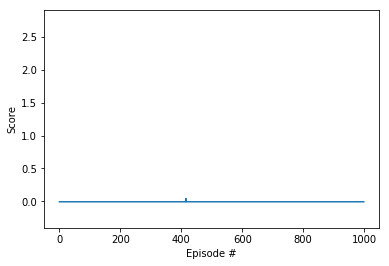

In [3]:
def plot_scores(scores, fig_indicator="normal"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.ylim((-0.4, 2.9))
    plt.show()
    
    fig_name = "Results/Figure_" + fig_indicator + ".png"
    fig.savefig(fig_name)
    
    np.save("Results/scores_" + fig_indicator + ".npy", scores)
    

def ddpg(n_episodes=2000, max_t=700):
    scores_deque = deque(maxlen=100)
    
    scores = []
    max_score = -np.Inf
    
    tt = time.time()
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        agent.reset()
        score = np.zeros(num_agents)                          # initialize the score (for each agent)
        for t in range(max_t):
            #time.sleep(0.05)
            actions = agent.act(states)
            #print('actions = ', actions)
            #if i_episode < 500:
            #    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            #    actions = np.clip(actions, -1, 1)
            env_info = env.step(actions)[brain_name]        # send the action to the environment            

            next_states = env_info.vector_observations   # get the next state
            rewards = env_info.rewards                   # get the reward
            dones = env_info.local_done                  # see if episode has finished            
            agent.step(states, actions, rewards, next_states, dones)
            states = next_states
            score += rewards
            
            if np.any(dones):
                break 
        scores_deque.append(np.mean(score))
        scores.append(np.mean(score))                
        """
        if i_episode == 200:
            for param_group in agent.actor_optimizer.param_groups:
                param_group['lr'] = 1e-4 # 1e-3

            for param_group in agent.critic_optimizer.param_groups:
                param_group['lr'] = 1e-4 #3e-4
                                            
        if i_episode == 240:
            for param_group in agent.actor_optimizer.param_groups:
                param_group['betas'] = (0, 0) 
            
            for param_group in agent.actor_optimizer.param_groups:
                param_group['lr'] = 0# 1e-3

            for param_group in agent.critic_optimizer.param_groups:
                param_group['lr'] = 0 #3e-4
        """
        
        print('\rEpisode {}\tAverage Score: {:.2f} \tScore: {:.2f}'.format(i_episode, np.mean(scores_deque), np.mean(score)))   
        if i_episode % 100 == 0 or np.mean(scores_deque) >= 30.0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))   
            elapsed = time.time() - tt # https://stackoverflow.com/questions/5849800/what-is-the-python-equivalent-of-matlabs-tic-and-toc-functions
            print('\t Elapsed Time: {:.2f}'.format(elapsed), 'seconds')
        if np.mean(scores_deque)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break 
            
    return scores    

print(['buffer_size = ', int(BUFFER_SIZE), 'batch_size = ', int(BATCH_SIZE), 'gamma=', GAMMA, 
       'tau=', TAU, 'lr_actor= ', LR_ACTOR, 'lr_critic=',LR_CRITIC, 'weight_decay=', WEIGHT_DECAY])
tt = time.time()
scores = ddpg(n_episodes=1000, max_t = 1400)
elapsed = time.time() - tt
plot_scores(scores, fig_indicator="ddpg_normal_soln_final")

### 4. Watch a Smart Agent!

The code below loads the trained weights from file to watch a smart agent. 

To visualize the trained environment,
 - change the __*visible_environment*__ variable to **True** in (**2. Instantiate the Environment and Agent**)
 - restart the kernel, and 
 - **skip** the previous section (**3. Train the Agent with DQN**).

In [4]:
# load the weights from file
#agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
#agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

for i in range(1):
    env_info = env.reset(train_mode=False)[brain_name]
    states = env_info.vector_observations                  # get the current state (for each agent)
    for j in range(200):
        actions = agent.act(states)
        env_info = env.step(actions)[brain_name]        # send the action to the environment
        states = env_info.vector_observations
        dones = env_info.local_done                  # see if episode has finished
        
        if np.any(dones):
            break     

In [5]:
env.close()